-   [<span class="toc-section-number">1</span> Motivation](#motivation)
-   [<span class="toc-section-number">2</span> What are democracy
    indices?](#what-are-democracy-indices)
-   [<span class="toc-section-number">3</span> The summary of the
    notebook](#the-summary-of-the-notebook)
    -   [<span class="toc-section-number">3.1</span> The latest state of
        democracy in the two
        nations](#the-latest-state-of-democracy-in-the-two-nations)
    -   [<span class="toc-section-number">3.2</span> Historic state of
        democracy: russia
        vs. ukraine](#historic-state-of-democracy-russia-vs.-ukraine)
-   [<span class="toc-section-number">4</span> The state of democracy
    indices in the last 30
    years](#the-state-of-democracy-indices-in-the-last-30-years)
    -   [<span class="toc-section-number">4.1</span> Representative
        government](#representative-government)
    -   [<span class="toc-section-number">4.2</span> Fundamental
        rights](#fundamental-rights)
    -   [<span class="toc-section-number">4.3</span> Checks on
        government](#checks-on-government)
    -   [<span class="toc-section-number">4.4</span> Impartial
        administration](#impartial-administration)
    -   [<span class="toc-section-number">4.5</span> Paticipatory
        engagement](#paticipatory-engagement)
-   [<span class="toc-section-number">5</span> Conclusion](#conclusion)
-   [<span class="toc-section-number">6</span>
    Acknowledgment](#acknowledgment)

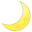

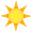

Code <span class="caret"></span>

-   <a href="#" id="rmd-show-all-code">Show All Code</a>
-   <a href="#" id="rmd-hide-all-code">Hide All Code</a>

# <span class="header-section-number">1</span> Motivation

> History proves that all dictatorships, all authoritarian forms of
> government are transient. Only democratic systems are not transient.
> Whatever the shortcomings, mankind has not devised anything superior.

Can you guess who is behind the quote?

A good answer would be one of these gentlemen:
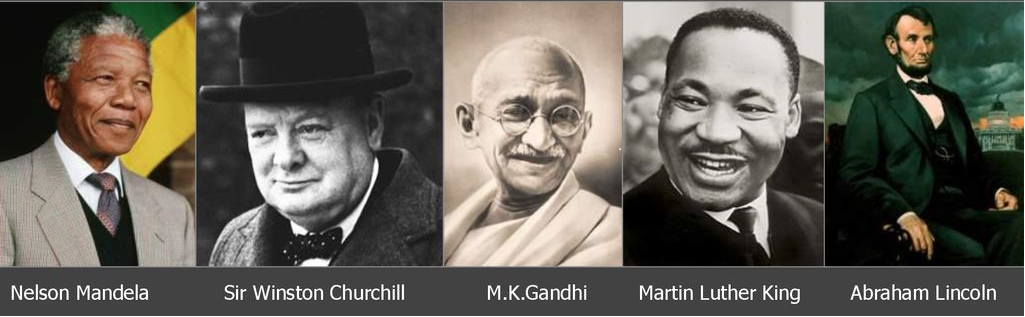

Let me help you by providing another quote by him:

> The Russian people chose democracy at the beginning of the 1990s and
> this was their final choice.

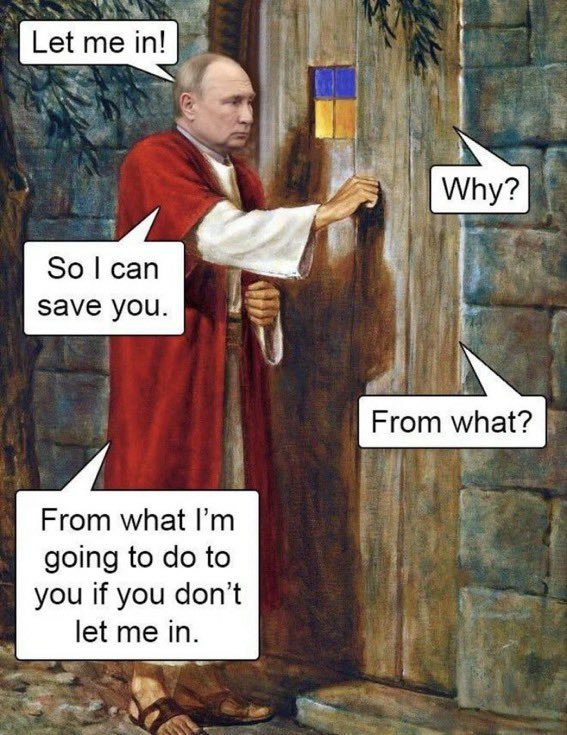

Yes, you’re right. Those are words of Putin, The Savior of Democracy!

> Nobody and nothing will stop Russia on the road to strengthening
> democracy and ensuring human rights and freedoms.

After months of speculation, Putin finally launched the full-scale
invasion of Ukraine. In his [televised
speech](https://www.smh.com.au/world/europe/full-transcript-of-vladimir-putin-s-speech-announcing-a-special-military-operation-20220224-p59zhq.html)
right at the beginning of the aggression, he revealed some of his
motivations in waging a full-fledged war (or as he wants others to
believe a “special military operation”). To rescue people who were
abused by genocide for eight years (right after the escape of his
beloved Ukrainian president [Viktor
Yushchenko](https://en.wikipedia.org/wiki/Viktor_Yushchenko)), “We will
strive for the **demilitarization and de-Nazification** of Ukraine, as
well as bringing to justice those who committed numerous bloody crimes
against civilians.” Is the president of Ukraine really a fascist
dictator like Hitler?

First of all, [Volodymyr
Zelenskyy](https://en.wikipedia.org/wiki/Volodymyr_Zelenskyy%5D) is
Jewish and he was elected by 73% of the votes in the 2019 presidential
election. “**Putin is not afraid of Nazis in Ukraine. He’s afraid of
democracy in Ukraine. And he recognizes that as democracy encroaches
upon Russia as it comes closer to Russia, there’s a threat that those
people will demand democracy**,” explains [Jeffrey
Veidlinger](https://time.com/6154493/denazification-putin-ukraine-history-context)
a professor of history at the University of Michigan.

Now we can pinpoint **democracy** as Putin’s main motivation to invade
Ukraine. Let’s have a deeper look at the state of democracy in Ukraine
and Russia.

# <span class="header-section-number">2</span> What are democracy indices?

Because democracy is such a broad term that covers the interactions
between many institutions in a society, measuring it quantitatively is
anything but easy. Therefore, several organizations publish some key
indices defined to include the true state of democracy in different
countries.

[International Institute for Democracy and Electoral
Assistance](https://www.idea.int) (International IDEA) publishes [annual
global state of democracy
(GSoD)](https://www.idea.int/our-work/what-we-do/global-state-democracy)
which is mainly based on analyses and measurements by the [V-Dem
Institute](http://www.v-dem.net) (Varieties of Democracy). The V-Dem
Institute’s measures of democracy are the most elaborate and granular
among several well-known democracy indexes (such as the [Polity data
series](https://en.wikipedia.org/wiki/Polity_data_series) and [Freedom
House](https://en.wikipedia.org/wiki/Freedom_House)’s [Freedom in the
World](https://en.wikipedia.org/wiki/Freedom_in_the_World)). In the
image below you can see an overview of indices and subattributes of GSoD
2021.

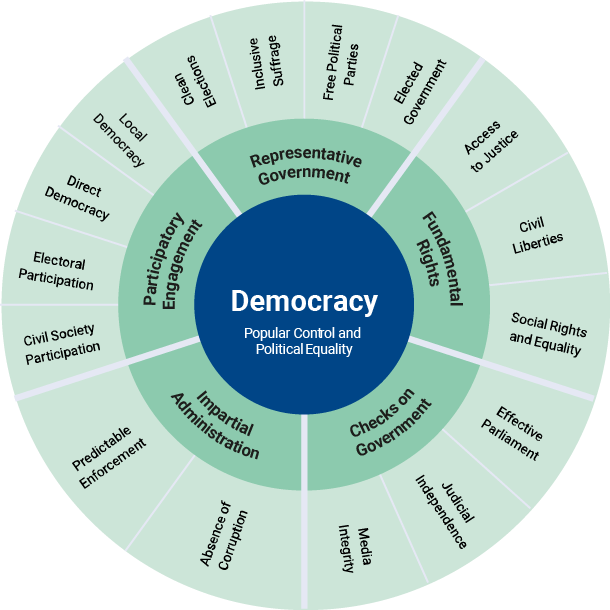

To avoid [confirmation
bias](https://en.wikipedia.org/wiki/Confirmation_bias) ([cherry
picking](https://en.wikipedia.org/wiki/Cherry_picking)), none of the
subattributes of the main indices were excluded (I am looking at you
[Ancel Keys](https://en.wikipedia.org/wiki/Seven_Countries_Study) ;) )

``` r
library(dplyr)     # Data manipulation
library(tidyr)     # Pivotting
library(ggplot2)   # Visualization
library(readr)     # To import CSV files
library(stringr)   # Regex and string operations
library(ggthemes)  # Extra themes for ggplot2
library(ggforce)   # An alternative for facetting
library(ggtext)    # A flexible text styling
library(rio)
```

``` r
data <- import("GSoDI_v5.1.csv")
head(data)
```

    ##   ID_country_name ID_country_code ID_year ID_country_year ID_region
    ## 1   United States               2    1975           21975         3
    ## 2   United States               2    1976           21976         3
    ## 3   United States               2    1977           21977         3
    ## 4   United States               2    1978           21978         3
    ## 5   United States               2    1979           21979         3
    ## 6   United States               2    1980           21980         3
    ##   ID_subregion ID_region_name ID_subregion_name      C_A1      L_A1      U_A1
    ## 1            9  North America     North America 0.7398104 0.6772100 0.8024108
    ## 2            9  North America     North America 0.7537784 0.6893580 0.8181988
    ## 3            9  North America     North America 0.8225352 0.7589952 0.8860751
    ## 4            9  North America     North America 0.8216701 0.7576965 0.8856437
    ## 5            9  North America     North America 0.8233757 0.7588888 0.8878625
    ## 6            9  North America     North America 0.8295235 0.7649787 0.8940683
    ##      C_SD11    L_SD11    U_SD11    C_SD12    C_SD13    L_SD13    U_SD13 C_SD14
    ## 1 0.7798935 0.7384039 0.8213832 0.8876139 0.7535725 0.6904456 0.8166994      1
    ## 2 0.8257763 0.7837914 0.8677613 0.8878152 0.7535725 0.6904456 0.8166994      1
    ## 3 0.8272549 0.7856223 0.8688875 0.8878152 0.9399965 0.8772447 1.0027482      1
    ## 4 0.8299354 0.7871096 0.8727613 0.8876139 0.9399965 0.8772447 1.0027482      1
    ## 5 0.8311599 0.7904956 0.8718243 0.8876139 0.9399965 0.8772447 1.0027482      1
    ## 6 0.8503308 0.8097669 0.8908947 0.8883185 0.9399965 0.8772447 1.0027482      1
    ##      L_SD14   U_SD14      C_A2      L_A2      U_A2    C_SD21    L_SD21
    ## 1 0.7807986 1.219201 0.7963784 0.7570421 0.8357147 0.8163043 0.7885023
    ## 2 0.7807986 1.219201 0.7973786 0.7565185 0.8382386 0.8161837 0.7887545
    ## 3 0.7807986 1.219201 0.7964175 0.7544319 0.8384032 0.8181911 0.7892858
    ## 4 0.7807986 1.219201 0.7988995 0.7581074 0.8396917 0.8180782 0.7906192
    ## 5 0.7807986 1.219201 0.8033825 0.7607815 0.8459836 0.8178965 0.7901144
    ## 6 0.7807986 1.219201 0.8069930 0.7651112 0.8488748 0.8154543 0.7883289
    ##      U_SD21    C_SD22    L_SD22    U_SD22   C_SD22A   L_SD22A   U_SD22A
    ## 1 0.8441063 0.8702692 0.8362814 0.9042570 0.8194480 0.7827896 0.8561065
    ## 2 0.8436129 0.8791524 0.8451153 0.9131896 0.8403934 0.8057745 0.8750123
    ## 3 0.8470964 0.8678586 0.8337342 0.9019829 0.8110129 0.7720302 0.8499955
    ## 4 0.8455373 0.8810217 0.8478595 0.9141839 0.8403934 0.8057745 0.8750123
    ## 5 0.8456786 0.8809583 0.8454046 0.9165121 0.8403934 0.8057745 0.8750123
    ## 6 0.8425797 0.9008242 0.8663218 0.9353266 0.8403934 0.8057745 0.8750123
    ##     C_SD22B   L_SD22B   U_SD22B   C_SD22C   L_SD22C   U_SD22C   C_SD22D
    ## 1 0.7790253 0.7278980 0.8301527 0.7913092 0.7035182 0.8791002 0.9130335
    ## 2 0.7790253 0.7278980 0.8301527 0.7913092 0.7035182 0.8791002 0.9130335
    ## 3 0.7790253 0.7278980 0.8301527 0.7913092 0.7035182 0.8791002 0.9130335
    ## 4 0.7790253 0.7278980 0.8301527 0.7913092 0.7035182 0.8791002 0.9130335
    ## 5 0.7790253 0.7278980 0.8301527 0.7913092 0.7035182 0.8791002 0.9130335
    ## 6 0.8407630 0.7771947 0.9043312 0.7913092 0.7035182 0.8791002 0.9130335
    ##     L_SD22D   U_SD22D   C_SD22E   L_SD22E   U_SD22E    C_SD23    L_SD23
    ## 1 0.8452549 0.9808121 0.6156659 0.5773959 0.6539359 0.5638445 0.5140654
    ## 2 0.8452549 0.9808121 0.6247496 0.5872798 0.6622194 0.5646742 0.5138272
    ## 3 0.8452549 0.9808121 0.6247496 0.5872798 0.6622194 0.5641708 0.5117967
    ## 4 0.8452549 0.9808121 0.6247496 0.5872798 0.6622194 0.5641128 0.5130100
    ## 5 0.8452549 0.9808121 0.6247496 0.5872798 0.6622194 0.5693590 0.5186639
    ## 6 0.8452549 0.9808121 0.6300445 0.5928437 0.6672453 0.5941150 0.5427906
    ##      U_SD23   C_SD23A   L_SD23A   U_SD23A   C_SD23B   L_SD23B   U_SD23B
    ## 1 0.6136236 0.6128647 0.5851979 0.6405316 0.6013092 0.5793947 0.6232238
    ## 2 0.6155211 0.6128647 0.5851979 0.6405316 0.6031382 0.5811230 0.6251534
    ## 3 0.6165450 0.6128647 0.5851979 0.6405316 0.6031382 0.5811230 0.6251534
    ## 4 0.6152155 0.6128647 0.5851979 0.6405316 0.6031382 0.5811230 0.6251534
    ## 5 0.6200540 0.6128647 0.5851979 0.6405316 0.6330919 0.6110820 0.6551018
    ## 6 0.6454395 0.6152796 0.5867476 0.6438116 0.6320925 0.6101578 0.6540273
    ##     C_SD23C   L_SD23C   U_SD23C      C_A3      L_A3      U_A3    C_SD31
    ## 1 0.5172835 0.4734056 0.5611615 0.8047956 0.7311679 0.8784233 0.7815669
    ## 2 0.5195193 0.4756143 0.5634244 0.8048437 0.7342891 0.8753982 0.7720701
    ## 3 0.5195193 0.4756143 0.5634244 0.7991261 0.7264331 0.8718190 0.7648131
    ## 4 0.5195193 0.4756143 0.5634244 0.7997795 0.7301537 0.8694053 0.7648131
    ## 5 0.5195193 0.4756143 0.5634244 0.7986350 0.7277462 0.8695237 0.7648131
    ## 6 0.6011718 0.5555027 0.6468410 0.7989040 0.7284247 0.8693834 0.7648131
    ##      L_SD31    U_SD31    C_SD32    L_SD32    U_SD32    C_SD33    L_SD33
    ## 1 0.7361285 0.8270053 0.7836402 0.7380429 0.8292375 0.8517110 0.8087777
    ## 2 0.7257756 0.8183646 0.7836402 0.7380429 0.8292375 0.8535008 0.8104868
    ## 3 0.7155492 0.8140770 0.7836402 0.7380429 0.8292375 0.8511685 0.8081338
    ## 4 0.7155492 0.8140770 0.7836402 0.7380429 0.8292375 0.8511321 0.8091615
    ## 5 0.7155492 0.8140770 0.7836402 0.7380429 0.8292375 0.8512367 0.8064033
    ## 6 0.7155492 0.8140770 0.7836402 0.7380429 0.8292375 0.8476980 0.8041663
    ##      U_SD33      C_A4      L_A4      U_A4    C_SD41    L_SD41    U_SD41
    ## 1 0.8946443 0.7655589 0.7264746 0.8046433 0.7602834 0.7230680 0.7974987
    ## 2 0.8965147 0.7647243 0.7254348 0.8040138 0.7602834 0.7230680 0.7974987
    ## 3 0.8942032 0.7660949 0.7295670 0.8026227 0.7602834 0.7230680 0.7974987
    ## 4 0.8931028 0.7675292 0.7279267 0.8071317 0.7602834 0.7230680 0.7974987
    ## 5 0.8960702 0.7660485 0.7264505 0.8056465 0.7602834 0.7230680 0.7974987
    ## 6 0.8912296 0.7780961 0.7385653 0.8176270 0.7799461 0.7458121 0.8140800
    ##      C_SD42    L_SD42    U_SD42    C_SD51    L_SD51    U_SD51 C_SD52 C_SD53
    ## 1 0.7647594 0.7232805 0.8062384 0.7884560 0.7363372 0.8405749 0.3823      0
    ## 2 0.7726957 0.7321896 0.8132017 0.7884560 0.7363372 0.8405749 0.5692      0
    ## 3 0.7726957 0.7321896 0.8132017 0.7884560 0.7363372 0.8405749 0.5692      0
    ## 4 0.7726957 0.7321896 0.8132017 0.7884560 0.7363372 0.8405749 0.3720      0
    ## 5 0.7726957 0.7321896 0.8132017 0.7884560 0.7363372 0.8405749 0.3720      0
    ## 6 0.7726957 0.7321896 0.8132017 0.7917094 0.7334344 0.8499843 0.5654      0
    ##      C_SD54   v_11_01   v_11_02   v_11_03   v_11_04   v_11_05 v_11_06 v_12_01
    ## 1 0.7794910 0.8156604 0.6138818 0.6768201 0.8233720 0.7198639       1       1
    ## 2 0.7794910 0.8156604 0.6138818 0.7466109 0.8238180 0.8076798       1       1
    ## 3 0.7794910 0.8156604 0.6138818 0.7466109 0.8238180 0.8076798       1       1
    ## 4 0.7794910 0.8156604 0.6138818 0.7456067 0.8227773 0.8151329       1       1
    ## 5 0.7794910 0.8156604 0.6138818 0.7456067 0.8227773 0.8151329       1       1
    ## 6 0.8847305 0.8156604 0.7353875 0.7464435 0.8899792 0.8075178       1       1
    ##     v_12_02   v_13_01   v_13_02   v_13_03   v_13_04 v_13_05 v_13_06 v_14_01
    ## 1 0.6628416 0.8258508 0.8351748 0.9666021 0.9368421       1       1       1
    ## 2 0.6634456 0.8258508 0.8351748 0.9666021 0.9405355       1       1       1
    ## 3 0.6634456 0.9598977 1.0000000 0.9666021 0.9405355       1       1       1
    ## 4 0.6628416 0.9598977 1.0000000 0.9666021 0.9362881       1       1       1
    ## 5 0.6628416 0.9598977 1.0000000 0.9666021 0.9362881       1       1       1
    ## 6 0.6649555 0.9598977 1.0000000 0.9666021 0.9377655       1       1       1
    ##   v_14_02 v_14_03 v_14_04   v_21_01   v_21_02   v_21_03   v_21_04 v_21_05
    ## 1       1       1       1 0.8347694 0.7881236 0.7377918 0.8257347       1
    ## 2       1       1       1 0.8347694 0.7881236 0.7377918 0.8257347       1
    ## 3       1       1       1 0.8347694 0.7881236 0.7377918 0.8257347       1
    ## 4       1       1       1 0.8347694 0.7881236 0.7377918 0.8257347       1
    ## 5       1       1       1 0.8347694 0.7881236 0.7377918 0.8257347       1
    ## 6       1       1       1 0.8347694 0.7881236 0.7377918 0.8257347       1
    ##     v_22_01   v_22_02   v_22_03   v_22_04  v_22_05   v_22_06 v_22_07 v_22_08
    ## 1 0.7783092 0.7334609 0.7311861 0.8462072 0.840461 0.9696884       1      NA
    ## 2 0.7783092 0.8264079 0.8354450 0.8462072 0.840461 0.9696884       1      NA
    ## 3 0.6684665 0.8264079 0.8354450 0.8462072 0.840461 0.9696884       1      NA
    ## 4 0.8099352 0.8264079 0.8354450 0.8462072 0.840461 0.9696884       1      NA
    ## 5 0.8099352 0.8264079 0.8354450 0.8462072 0.840461 0.9696884       1      NA
    ## 6 0.8099352 0.8264079 0.8354450 0.8462072 0.840461 0.9696884       1      NA
    ##     v_22_11   v_22_12   v_22_13 v_22_14 v_22_15 v_22_16   v_22_21   v_22_22
    ## 1 0.7168710 0.9408733 0.8614549       1      NA      NA 0.9526773 0.9110335
    ## 2 0.7168710 0.9408733 0.8614549       1      NA      NA 0.9526773 0.9110335
    ## 3 0.7168710 0.9408733 0.8614549       1      NA      NA 0.9526773 0.9110335
    ## 4 0.7168710 0.9408733 0.8614549       1      NA      NA 0.9526773 0.9110335
    ## 5 0.7168710 0.9408733 0.8614549       1      NA      NA 0.9526773 0.9110335
    ## 6 0.7860479 0.9408733 0.8685481       1      NA      NA 0.9526773 0.9110335
    ##   v_22_23 v_22_24   v_22_31   v_22_32   v_22_33 v_22_34 v_22_35 v_22_36
    ## 1       1      NA 0.8787879 0.8814138 0.9242258       1      NA      NA
    ## 2       1      NA 0.8787879 0.8814138 0.9242258       1      NA      NA
    ## 3       1      NA 0.9218422 0.8814138 0.9242258       1      NA      NA
    ## 4       1      NA 0.9218422 0.8814138 0.9242258       1      NA      NA
    ## 5       1      NA 0.9218422 0.8814138 0.9242258       1      NA      NA
    ## 6       1      NA 0.9218422 0.8814138 0.9242258       1      NA      NA
    ##     v_22_41   v_22_42  v_22_43   v_22_44 v_22_45 v_22_46 v_22_47   v_23_01
    ## 1 0.8286239 0.7459654 0.783451 0.7944549      NA      NA      NA 0.7914938
    ## 2 0.8286239 0.7459654 0.783451 0.7944549       1      NA      NA 0.7914938
    ## 3 0.8286239 0.7459654 0.783451 0.7944549       1      NA      NA 0.7914938
    ## 4 0.8286239 0.7459654 0.783451 0.7944549       1      NA      NA 0.7914938
    ## 5 0.8286239 0.7459654 0.783451 0.7944549       1      NA      NA 0.7914938
    ## 6 0.8286239 0.7883285 0.783451 0.7944549       1      NA      NA 0.7914938
    ##     v_23_02   v_23_03   v_23_04   v_23_05   v_23_06   v_23_07   v_23_08
    ## 1 0.5264593 0.7198084 0.6432076 0.5843778 0.7927835 0.9703476 0.8100616
    ## 2 0.5264593 0.7198084 0.6432076 0.5843778 0.7927835 0.9703476 0.8100616
    ## 3 0.5264593 0.7198084 0.6432076 0.5843778 0.7927835 0.9703476 0.8100616
    ## 4 0.5264593 0.7198084 0.6432076 0.5843778 0.7927835 0.9703476 0.8100616
    ## 5 0.5264593 0.7198084 0.6432076 0.5843778 0.7927835 0.9703476 0.8100616
    ## 6 0.5264593 0.6944920 0.6432076 0.5843778 0.8103093 0.9764826 0.8234086
    ##     v_23_09 v_23_10   v_23_21   v_23_22   v_23_23 v_23_24   v_23_25   v_23_26
    ## 1 0.9236402      NA 0.9205114 0.8204495 0.6571429      NA 0.5290898 0.6216136
    ## 2 0.9236402      NA 0.9244024 0.8242879 0.7094567      NA 0.5303643 0.6399704
    ## 3 0.9236402      NA 0.9282935 0.8303995 0.6981891      NA 0.5314104 0.6399704
    ## 4 0.9236402      NA 0.9321845 0.8319274 0.7062374      NA 0.5322498 0.6399704
    ## 5 0.9236402      NA 0.9355197 0.8387843 0.7299799      NA 0.5329119 0.6399704
    ## 6 0.9382845      NA 0.9388549 0.8358030 0.7154930      NA 0.5334207 0.6399704
    ##     v_23_27   v_23_31   v_23_32   v_23_33    v_23_34   v_23_35 v_23_36 v_23_37
    ## 1 0.5174436 0.5573244 0.7857755 0.7015473 0.05803922 0.6905504      NA      NA
    ## 2 0.5174436 0.5573244 0.7857755 0.7036014 0.06901961 0.6905504      NA      NA
    ## 3 0.5174436 0.5573244 0.7857755 0.7057346 0.06901961 0.6905504      NA      NA
    ## 4 0.5174436 0.5573244 0.7857755 0.7079000 0.06431373 0.6905504      NA      NA
    ## 5 0.5174436 0.5573244 0.7857755 0.7099843 0.06431373 0.6905504      NA      NA
    ## 6 0.5174436 0.6643196 0.8490146 0.7118832 0.05803922 0.7871236      NA      NA
    ##     v_31_01   v_31_02   v_31_03   v_31_04 v_31_05   v_32_01   v_32_02   v_32_03
    ## 1 0.8941822 0.6870727 0.9220227 0.8193481       1 0.8165138 0.7169402 0.8726134
    ## 2 0.8577387 0.6870727 0.9220227 0.8193481       1 0.8165138 0.7169402 0.8726134
    ## 3 0.8577387 0.6314199 0.9220227 0.8193481       1 0.8165138 0.7169402 0.8726134
    ## 4 0.8577387 0.6314199 0.9220227 0.8193481       1 0.8165138 0.7169402 0.8726134
    ## 5 0.8577387 0.6314199 0.9220227 0.8193481       1 0.8165138 0.7169402 0.8726134
    ## 6 0.8577387 0.6314199 0.9220227 0.8193481       1 0.8165138 0.7169402 0.8726134
    ##     v_32_04 v_32_05 v_32_06 v_33_01   v_33_02   v_33_03   v_33_04 v_33_05
    ## 1 0.8843989      NA      NA 0.89729 0.7439784 0.7935921 0.9508222       1
    ## 2 0.8843989      NA      NA 0.89729 0.7439784 0.7935921 0.9508222       1
    ## 3 0.8843989      NA      NA 0.89729 0.7439784 0.7935921 0.9508222       1
    ## 4 0.8843989      NA      NA 0.89729 0.7439784 0.7935921 0.9508222       1
    ## 5 0.8843989      NA      NA 0.89729 0.7439784 0.7935921 0.9508222       1
    ## 6 0.8843989      NA      NA 0.89729 0.7278087 0.7935921 0.9508222       1
    ##     v_41_01   v_41_02   v_41_03   v_41_04 v_41_05   v_42_01   v_42_02   v_42_03
    ## 1 0.6507011 0.8165598 0.9171806 0.7729964      NA 0.7401238 0.8236634 0.7706883
    ## 2 0.6507011 0.8165598 0.9171806 0.7729964      NA 0.7607606 0.8236634 0.7706883
    ## 3 0.6507011 0.8165598 0.9171806 0.7729964      NA 0.7607606 0.8236634 0.7706883
    ## 4 0.6507011 0.8165598 0.9171806 0.7729964      NA 0.7607606 0.8236634 0.7706883
    ## 5 0.6507011 0.8165598 0.9171806 0.7729964      NA 0.7607606 0.8236634 0.7706883
    ## 6 0.7009579 0.8165598 0.9171806 0.7729964      NA 0.7607606 0.8236634 0.7706883
    ##     v_42_04   v_42_05 v_42_06   v_51_01   v_51_02   v_51_03   v_51_04   v_51_05
    ## 1 0.7777388 0.7706883      NA 0.8648316 0.8215522 0.7552493 0.6821079 0.6143079
    ## 2 0.7777388 0.7706883      NA 0.8648316 0.8215522 0.8649934 0.6821079 0.6143079
    ## 3 0.7777388 0.7706883      NA 0.8648316 0.8326601 0.8649934 0.6821079 0.6143079
    ## 4 0.7777388 0.7706883      NA 0.8648316 0.8326601 0.8649934 0.6821079 0.6143079
    ## 5 0.7777388 0.7706883      NA 0.8648316 0.8326601 0.8649934 0.6821079 0.6143079
    ## 6 0.7777388 0.7706883      NA 0.8648316 0.8884882 0.8899278 0.6634541 0.6143079
    ##     v_51_06 v_52_01 v_53_01 v_53_02  v_54_01   v_54_02 regime_status_name
    ## 1 0.7149055  0.3823       0       1 0.998996 0.7794910          Democracy
    ## 2 0.7149055  0.5692       0       1 0.998996 0.7794910          Democracy
    ## 3 0.7149055  0.5692       0       1 0.998996 0.7794910          Democracy
    ## 4 0.6746204  0.3720       0       1 0.998996 0.7794910          Democracy
    ## 5 0.7155253  0.3720       0       1 0.998996 0.7794910          Democracy
    ## 6 0.5912612  0.5654       0       1 0.998996 0.8847305          Democracy
    ##   democratic_performance_name democratic_performance_numeric
    ## 1   High performing democracy                              1
    ## 2   High performing democracy                              1
    ## 3   High performing democracy                              1
    ## 4   High performing democracy                              1
    ## 5   High performing democracy                              1
    ## 6   High performing democracy                              1

The dataset consists of many variables which are different attributes,
subattributes, and indicators. We can select and rename our desired
variables (subattributes) according to the
[codebook](https://www.idea.int/gsod-indices/sites/default/files/inline-files/global-state-of-democracy-indices-codebook-v5.pdf)
provided with the dataset.

``` r
attributes <- tibble(attribute = c("A1", "A2", "A3", "A4", "A5"),
                     indices = c(
                       "Representative Government ",
                       "Fundamental Rights",
                       "Checks on Government",
                       "Impartial Administration",
                       "Participatory Engagement"
                       )
                     ) 

data <- data %>% 
  select(ID_country_name, ID_year, C_SD11, C_SD12,
         C_SD13, C_SD14, C_SD21, C_SD22A, C_SD22B,
         C_SD22C, C_SD22D, C_SD22E, C_SD23A, C_SD23B, 
         C_SD23C, C_SD31, C_SD32, C_SD33, C_SD41, 
         C_SD42, C_SD51, C_SD52, C_SD53, C_SD54, 
         democratic_performance_name,
         democratic_performance_numeric) %>%
  rename(country = ID_country_name, 
         year = ID_year,  
         clean_elections_A1 = C_SD11, 
         inclusive_suffrage_A1 = C_SD12,
         free_political_parties_A1 = C_SD13, 
         elected_government_A1 = C_SD14, 
         access_to_justice_A2 = C_SD21, 
         freedom_of_expression_A2 = C_SD22A, 
         freedom_of_association_and_assembly_A2 = C_SD22B,
         freedom_of_religion_A2 = C_SD22C, 
         freedom_of_movement_A2 = C_SD22D, 
         personal_integrity_and_security_A2 = C_SD22E, 
         social_group_equality_A2 = C_SD23A, 
         basic_welfare_A2 = C_SD23B, 
         gender_equality_A2 = C_SD23C, 
         effective_parliament_A3 = C_SD31, 
         judicial_independence_A3 = C_SD32,  
         media_integrity_A3 = C_SD33, 
         absence_of_corruption_A4 = C_SD41,  
         predictable_enforcement_A4 = C_SD42, 
         civil_society_participation_A5 = C_SD51, 
         electoral_participation_A5 = C_SD52,
         direct_democracy_A5 = C_SD53, 
         local_democracy_A5 = C_SD54) %>%
  filter(country %in% c("Russia", "Ukraine", "World") &
           year >= 1991)

head(data)
```

    ##   country year clean_elections_A1 inclusive_suffrage_A1
    ## 1  Russia 1991          0.5389405             0.9508783
    ## 2  Russia 1992          0.5501251             0.9508783
    ## 3  Russia 1993          0.5648654             0.8879158
    ## 4  Russia 1994          0.5684420             0.8879158
    ## 5  Russia 1995          0.5674261             0.8884695
    ## 6  Russia 1996          0.5502556             0.8884695
    ##   free_political_parties_A1 elected_government_A1 access_to_justice_A2
    ## 1                 0.3792062             0.6091381            0.3870421
    ## 2                 0.4463138             0.6091381            0.5212934
    ## 3                 0.4774513             0.5082715            0.5130469
    ## 4                 0.4774513             0.6091381            0.5376810
    ## 5                 0.4774513             0.6091381            0.5383441
    ## 6                 0.4774513             0.6091381            0.5449177
    ##   freedom_of_expression_A2 freedom_of_association_and_assembly_A2
    ## 1                0.4806488                              0.4722338
    ## 2                0.6384168                              0.5657210
    ## 3                0.6284743                              0.5351115
    ## 4                0.6467827                              0.6356033
    ## 5                0.6270683                              0.6356033
    ## 6                0.6270683                              0.6356033
    ##   freedom_of_religion_A2 freedom_of_movement_A2
    ## 1              0.4790002              0.4444625
    ## 2              0.5166017              0.5529897
    ## 3              0.5644861              0.6388810
    ## 4              0.5644861              0.5822469
    ## 5              0.5377195              0.6388810
    ## 6              0.5377195              0.6388810
    ##   personal_integrity_and_security_A2 social_group_equality_A2 basic_welfare_A2
    ## 1                          0.3747407                0.5507497        0.5695442
    ## 2                          0.4162908                0.5616480        0.5627817
    ## 3                          0.4179640                0.5603379        0.5634584
    ## 4                          0.4152791                0.5629084        0.5619781
    ## 5                          0.4005819                0.5465773        0.5619781
    ## 6                          0.4046204                0.5468224        0.5623697
    ##   gender_equality_A2 effective_parliament_A3 judicial_independence_A3
    ## 1          0.5141991               0.4608395                0.3074962
    ## 2          0.5213444               0.5012832                0.4140868
    ## 3          0.5273237               0.3667204                0.4118214
    ## 4          0.5305897               0.5333813                0.3739641
    ## 5          0.5236534               0.5333813                0.3753601
    ## 6          0.5236534               0.5333813                0.3876028
    ##   media_integrity_A3 absence_of_corruption_A4 predictable_enforcement_A4
    ## 1          0.5522191                0.3620532                  0.3837762
    ## 2          0.6588342                0.3125846                  0.4074090
    ## 3          0.6583254                0.3125846                  0.3905603
    ## 4          0.6610896                0.2735342                  0.4127136
    ## 5          0.6737043                0.2735342                  0.4127136
    ## 6          0.6696072                0.2668856                  0.4231593
    ##   civil_society_participation_A5 electoral_participation_A5 direct_democracy_A5
    ## 1                      0.4520171                     0.7327           0.1604780
    ## 2                      0.5018751                     0.7327           0.1604780
    ## 3                      0.5018751                     0.4722           0.1809646
    ## 4                      0.5018751                     0.4722           0.1809646
    ## 5                      0.5018751                     0.6277           0.1809646
    ## 6                      0.5018751                     0.6761           0.1809646
    ##   local_democracy_A5 democratic_performance_name democratic_performance_numeric
    ## 1          0.2808150               Hybrid Regime                              4
    ## 2          0.3487219               Hybrid Regime                              4
    ## 3          0.3487219              Weak democracy                              3
    ## 4          0.4243768              Weak democracy                              3
    ## 5          0.4243768              Weak democracy                              3
    ## 6          0.4243768              Weak democracy                              3

# <span class="header-section-number">3</span> The summary of the notebook

## <span class="header-section-number">3.1</span> The latest state of democracy in the two nations

The bar graph below is the main result of the notebook. It consists of
the latest values of all the attributes and subattributes of the [Global
State of Democracy indices](https://www.idea.int) for Ukraine, Russia,
and the world in 2020.

``` r
data %>%
  filter(year == 2020) %>%
  select(-c(
    year, 
    democratic_performance_name, 
    democratic_performance_numeric
    )
  ) %>%
  pivot_longer(!country, 
               names_to = "subattribute",
               values_to = "value") %>%
  mutate(attribute = str_extract(subattribute, "A\\d$")) %>%
  left_join(attributes) %>%
  mutate(country = factor(country, 
                          levels = c("World", "Ukraine", "Russia"), 
                          ordered = TRUE),
         subattribute = str_replace_all(subattribute, "_", " "),
         subattribute = str_remove(subattribute, "A\\d"),
         subattribute = str_to_sentence(subattribute)) %>%
  ggplot(aes(subattribute, value, fill = country)) +
  geom_col(width = 0.7, position = "dodge") +
  facet_col(~indices, 
             scales = "free",
             space = "free") +
  coord_flip() +
  scale_fill_manual(values = c(Russia = "#D62828", 
                               World = "#004266",
                               Ukraine = "#FCB322"
                               )
                    ) +
  theme_hc() +
  theme(
    axis.text = element_text(face = "bold", color = "grey40"),
    axis.title = element_text(color = "grey40"),
    plot.title = element_markdown(hjust = 1, color = "grey40"),
    plot.subtitle = element_text(color = "grey40"),
    legend.position = "none",
    strip.background = element_rect(fill = "lavender"),
    strip.text = element_text(face = "bold", color = "grey40")) +
  labs(title = "Subattributes of democracy in <span style = 'color:#004266;'>                  the world</span>, <span style = 'color:#FCB322;'>Ukraine
               </span>, and <span style = 'color:#D62828;'>Russia</span>
               in 2020",
       subtitle = "The values are between 0 and 1; higher is better",
       x = NULL)
```

    ## Joining, by = "attribute"

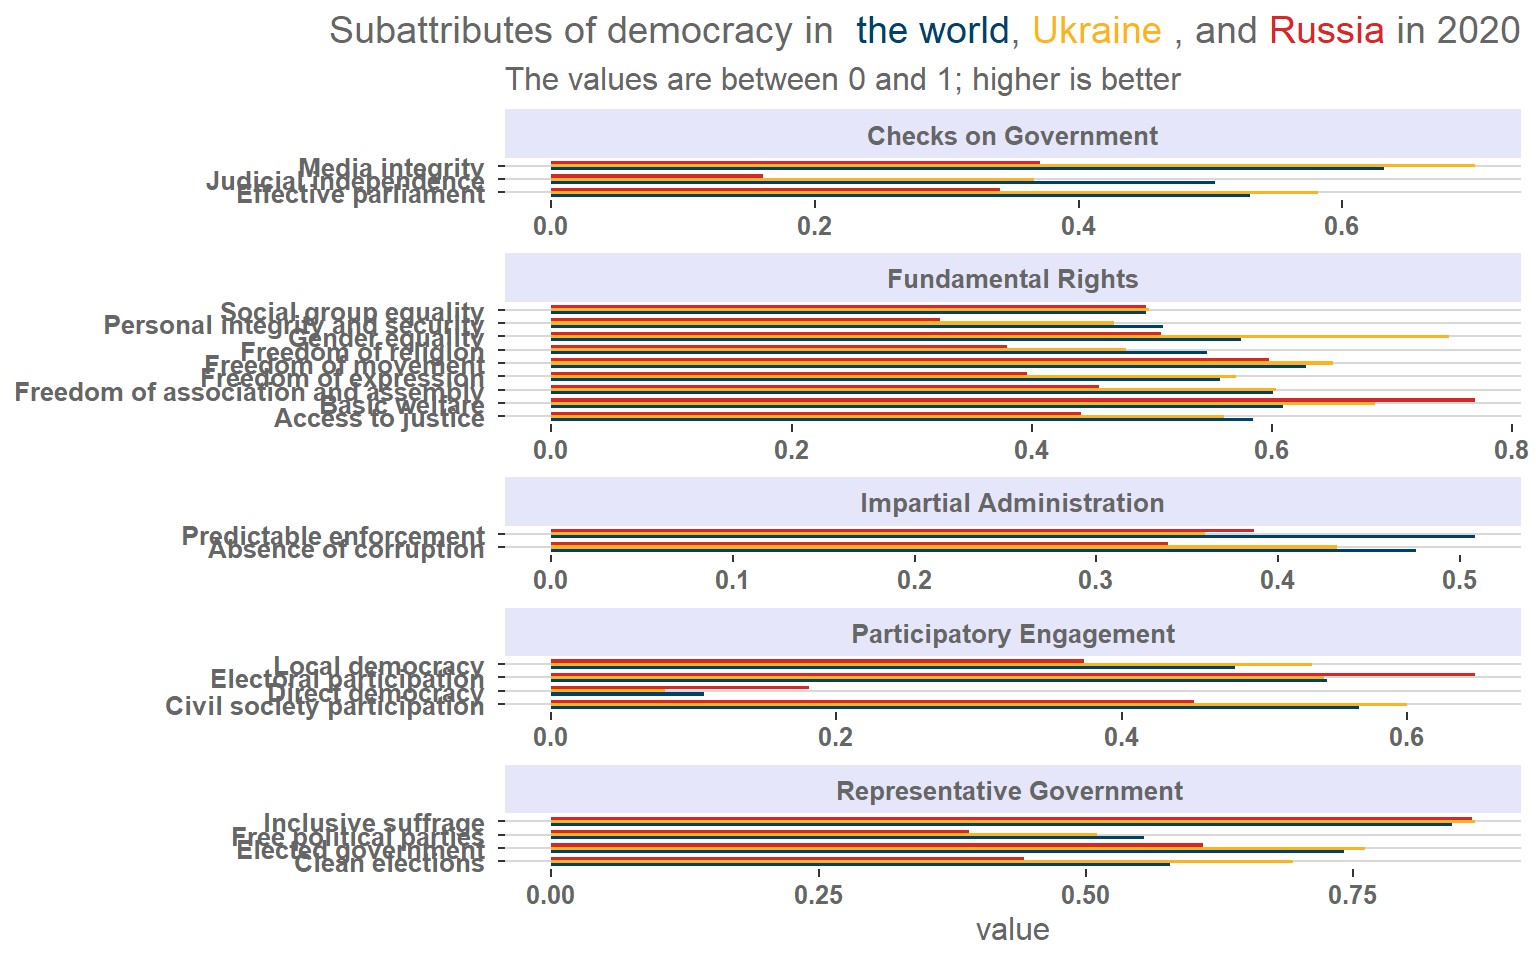

At the end of 2020 Ukraine did better than Russia in 18 out of 22
democracy-related items. It also scored better than the world average in
more than half of the attributes. So, in contrast to what Kremlin
asserts, **not only Ukraine is not a “neo-Nazi” or “fascist” state but
is far more democratic than Russia**.

## <span class="header-section-number">3.2</span> Historic state of democracy: russia vs. ukraine

``` r
# Defining a function for drawing plots

theme_costum <- function (base_size = 11, base_family = "") {
  theme_classic() +
    theme(
      plot.title = element_text(color = "grey40"),
      plot.subtitle = element_text(color = "grey40"),
      axis.title = element_text(color = "grey40"),
      axis.line = element_line(color = "grey70", size = 1),
      axis.ticks = element_line(color = "grey70"),
      axis.text = element_text(color = "grey40"),
      legend.position = "none"
    )
}

data %>%
  filter(country %in% c("Russia", "Ukraine")) %>%
  mutate(country_code = ifelse(country == "Ukraine", "ua", "ru")) %>%
  ggplot(aes(year, reorder(democratic_performance_name,
                           -democratic_performance_numeric),
             group = country
             )
         ) +
  geom_point(aes(year, 
                 reorder(democratic_performance_name,
                         -democratic_performance_numeric),
                 col = country
                 ), 
             size = 3
             ) +
  ggbump::geom_bump(aes(col = country), 
                    size = 2, 
                    lineend = "round") +
  scale_color_manual(values = c(Russia = "#D62828",
                                Ukraine = "#FCB322"
                                )
                     ) +
  #geom_flag(data = . %>% 
   #           filter(year == max(year)),
    #        aes(x = year + 1, 
     #           y = democratic_performance_name,
      #          country = country_code
       #         )
        #    ) +
  labs(title = "Government systems in <span style = 'color:#FCB322;'>Ukraine
                </span> and <span style = 'color:#D62828;'>Russia</span>
                from 1991 to 2020",
       y = "The ruling system"
       ) +
  theme_costum() +
  theme(
    panel.background = element_rect(fill = "grey99"),
    legend.position = "none",
    plot.title = element_markdown()
    )
```

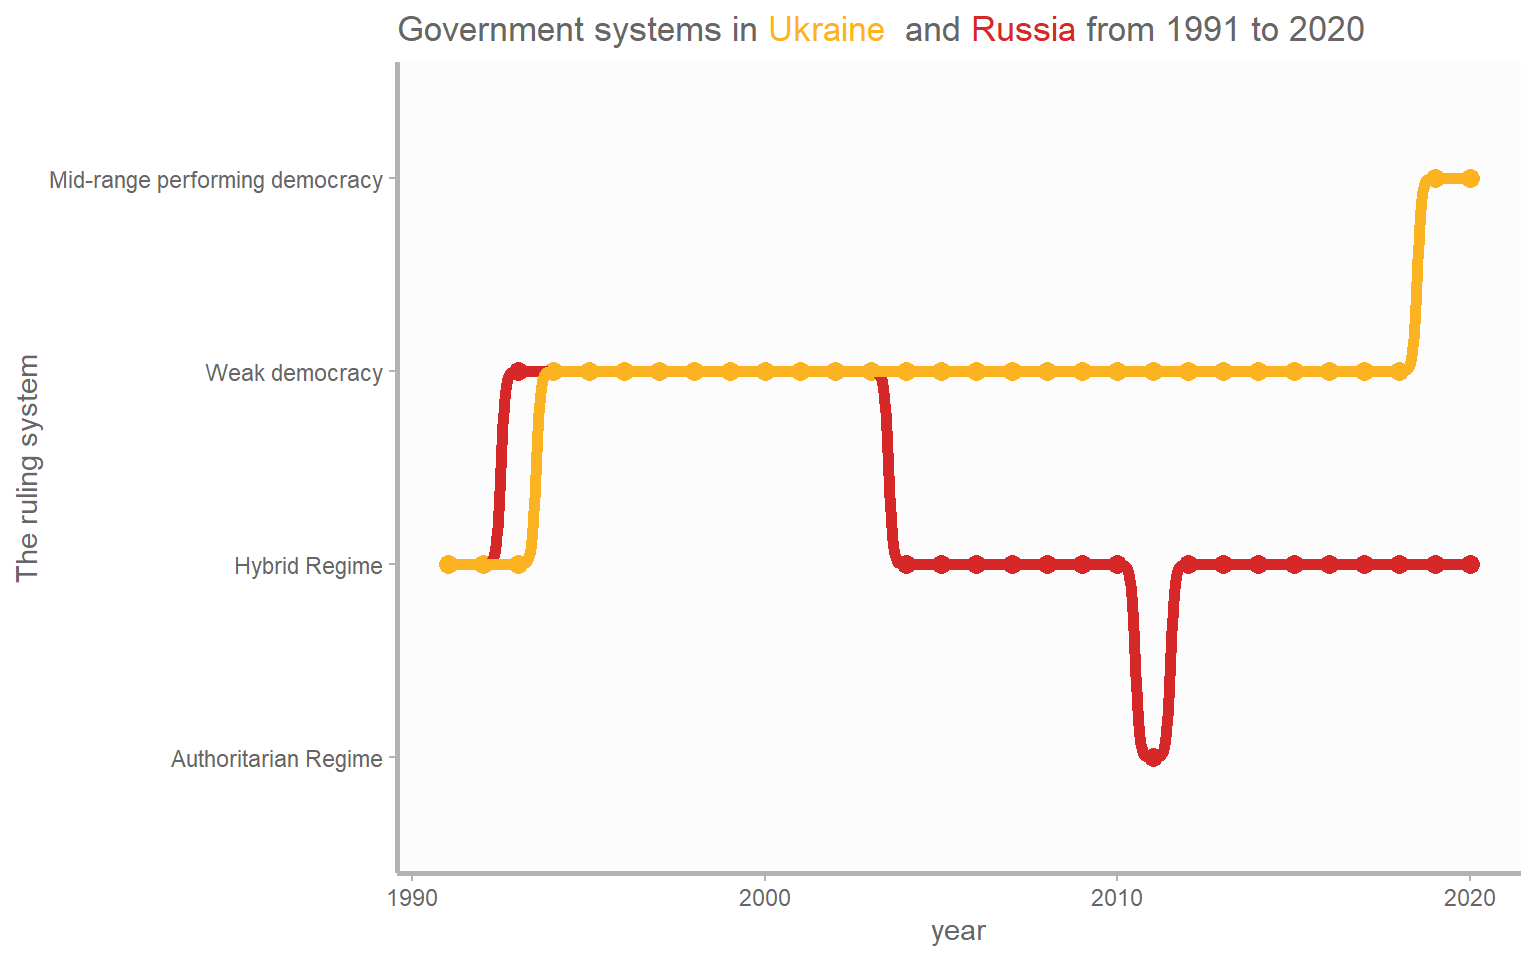

Both Ukraine and Russia entered the 90s as a hybrid regime. Both
countries began the 21 century as democratic nations (although weak
ones). But their path began to change when Putin became the president in
2000 leading his country into a more authoritarian regime. In contrast,
as soon as Zelenskyy got the post in 2019, Ukraine experienced a great
leap towards a full-fledged democracy. Now we can confer why Putin’s
fear of democracy is so urgent.

The rest of the notebook deal with the historical state of attributes
and subattributes in Ukraine, Russia, and the world in detail.

``` r
graph_index <- function(index){
  subattribute <- as.character(index) %>%
    str_replace_all("_", " ") %>%
    str_remove_all("A\\d") %>%
    str_to_sentence()
  
  ggplot() +
    geom_path(data = data, 
              aes(year, 
                  .data[[index]],
                  group = country,
                  col = country
                  ), 
              size = 1.5
              ) +
    scale_color_manual(values = c(Russia = "#D62828", 
                                  World = "#004266",
                                  Ukraine = "#FCB322"
                                  )
                       ) +
    scale_y_continuous(expand = c(0, 0)) +
    scale_x_continuous(n.breaks = 6) +
    labs(title = 
           str_c(subattribute,
                 "in <span style = 'color:#004266;'>the world</span>, 
                 <span style = 'color:#FCB322;'>Ukraine</span>, and 
                 <span style = 'color:#D62828;'>Russia</span>
                 from 1991 to 2020"),
         subtitle = "The values are between 0 and 1; higher is better",
         y = subattribute
         ) +
    theme_costum() +
  theme(plot.title = element_markdown())
}
```

# <span class="header-section-number">4</span> The state of democracy indices in the last 30 years

Now is the time to delve deeper into the details of the historical
trends of different indices of democracy. The brief introduction for
each attribute and subattribute is mostly from the attached
[codebook](https://www.idea.int/gsod-indices/sites/default/files/inline-files/global-state-of-democracy-indices-codebook-v5.pdf)
of the GSod dataset.

## <span class="header-section-number">4.1</span> Representative government

The representative government attribute emphasizes contested and
inclusive popular elections for legislative and executive offices. This
attribute distinguishes among four subattributes. Three of them (clean
elections, free political parties, and elected government) have been
aggregated into a contestation index using [Bayesian factor
analysis](https://en.wikipedia.org/wiki/Bayes_factor). The
representative government index is obtained by multiplying the
contestation index by the fourth subattribute, inclusive suffrage.

### <span class="header-section-number">4.1.1</span> Clean elections

The clean elections subattribute denotes the extent to which elections
for national, representative political offices are free from
irregularities. Two of the indicators reflect free elections more
generally, whereas the other indicators capture more specific aspects of
this feature, such as irregularities in voter registration and
government intimidation.

``` r
Ukraine_seg = tibble(x = rep(c(2004, 2010, 2019), 2), 
                     xend = rep(c(2004, 2010, 2019), 2),
                     y = c(rep(0.7, 3), rep(0.28, 3)), 
                     yend =c(rep(0.8, 3), rep(0.32, 3))
                     )

Russia_seg = tibble(x = c(2000, 2011),
                    xend = c(2000, 2011),
                    y = rep(0.28, 2),
                    yend = rep(0.42, 2))

Ukraine_label = tibble(x = c(2004, 2010, 2019),
                       y = rep(0.75, 3),
                       label = c("The orange revolution",
                                 "Russophile Yanukovych became\nUkraine's president",
                                 "Zelensky became\npresident"))

graph_index("clean_elections_A1") +
  geom_segment(data = Ukraine_seg, 
               aes(x = x, xend = xend, 
                   y = y, yend = yend
                   ),
               color = "#FCB322"
               ) +
  geom_segment(data = Russia_seg, 
               aes(x = x, xend = xend, 
                   y = y, yend = yend
                   ),
               color = "#D62828"
               ) +
  geom_label(data = Ukraine_label, 
             aes(x = x, y = y, label = label),
             label.size = NA,
             label.padding = unit(0, "lines"),
             size = 3
             ) +
  geom_label(aes(x = 2000,
                 y = 0.36, 
                 label = "Putin's presidency\nbegan"
                 ),
             label.size = NA,
             size = 3
             ) +
  geom_label(aes(x = 2011, 
                 y = 0.36, 
                 label = "The worst protests\nafter the fall of USSR"
                 ),
             label.size = NA,
             size = 3
             )
```

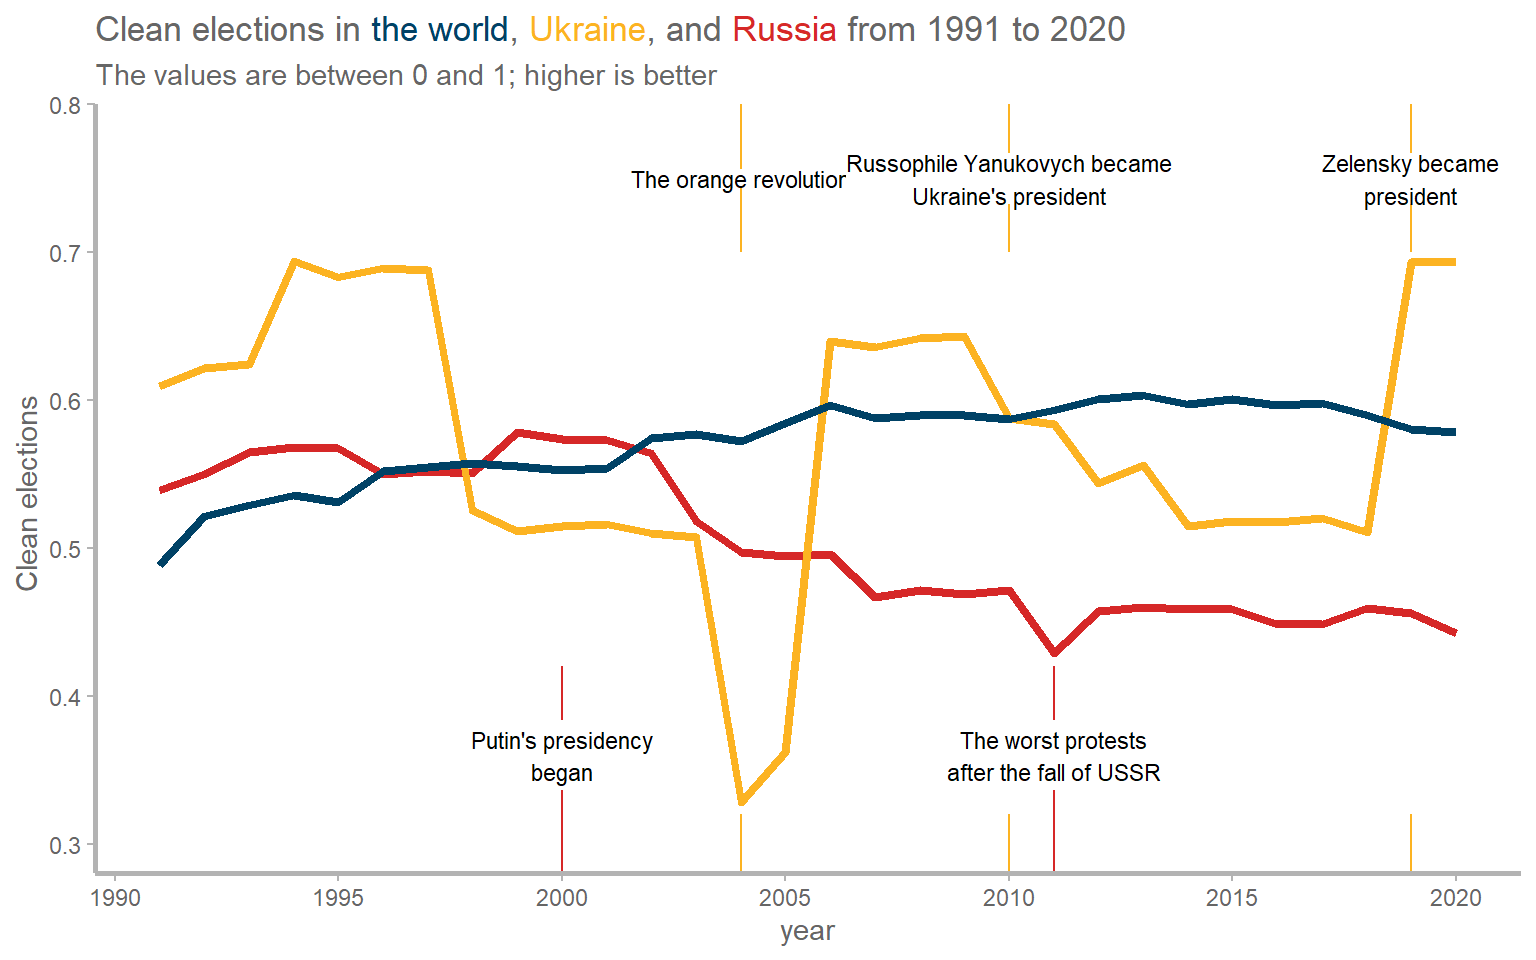

After Putin’s inauguration, Russia’s path in this subattribute was
steadily downward. On the other hand, Ukraine improved its grave
situation after [the Orange
Revolution](https://en.wikipedia.org/wiki/Orange_Revolution) under
Yushchenko’s administration. However, the state of clean elections
deteriorated under Yanukovych’s administration, and finally, it improved
largely after Zelenskyy became the president.

### <span class="header-section-number">4.1.2</span> Inclusive suffrage

The inclusive suffrage subattribute denotes the extent to which adult
citizens have equal and universal passive and active voting rights.

``` r
graph_index("inclusive_suffrage_A1")
```

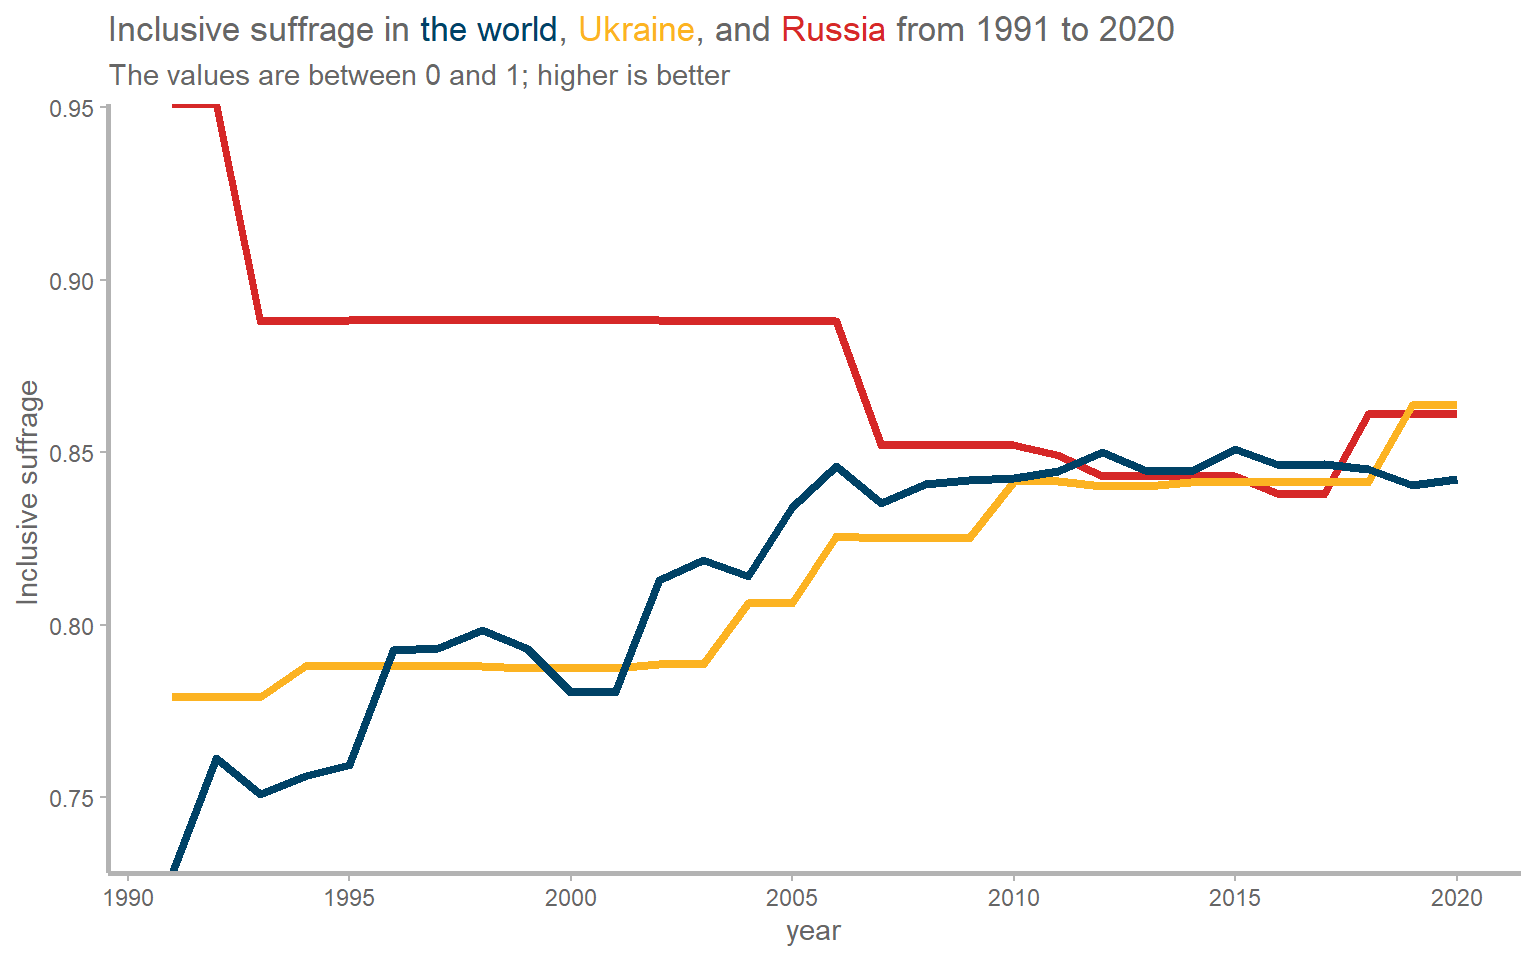

In this subattribute the latest score for Ukraine and Russia are the
same as the world’s average. However, while Russia gradually descended
from its initial superior state after the collapse of the Soviet Union,
Ukraine improved.

### <span class="header-section-number">4.1.3</span> Free political parties

The free political parties subattribute denotes the extent to which
political parties are free to form and campaign for political office.
Six indicators, partly based on expert surveys and partly in-house
coded, are used to measure how free political parties are. All of them
reflect whether political parties generally, and opposition parties in
particular, are allowed to organize freely and run in elections.

``` r
Ukraine_seg = tibble(x = rep(2010, 2),
                     xend = rep(2010, 2),
                     y = c(0.35, 0.65),
                     yend = c(0.38, 0.75)
                     )

graph_index("free_political_parties_A1") +
  geom_segment(data = Ukraine_seg,
               aes(x = x, y = y, xend = xend, yend = yend), 
               color = "#FCB322"
               ) +
  geom_segment(aes(x = 2000,
                   y = 0.35,
                   xend = 2000,
                   yend = 0.41
                   ),
               color = "#D62828"
               ) +
  geom_label(aes(x = 2010,
                 y = 0.7, 
                 label = "Russophile Yanukovych became \n Ukraine's president"
                 ),
             label.size = NA,
             size = 3
             ) +
  geom_label(aes(x = 2000,
                 y = 0.38,
                 label = "Putin became president",
                 ),
             label.size = NA,
             size = 3
             )
```

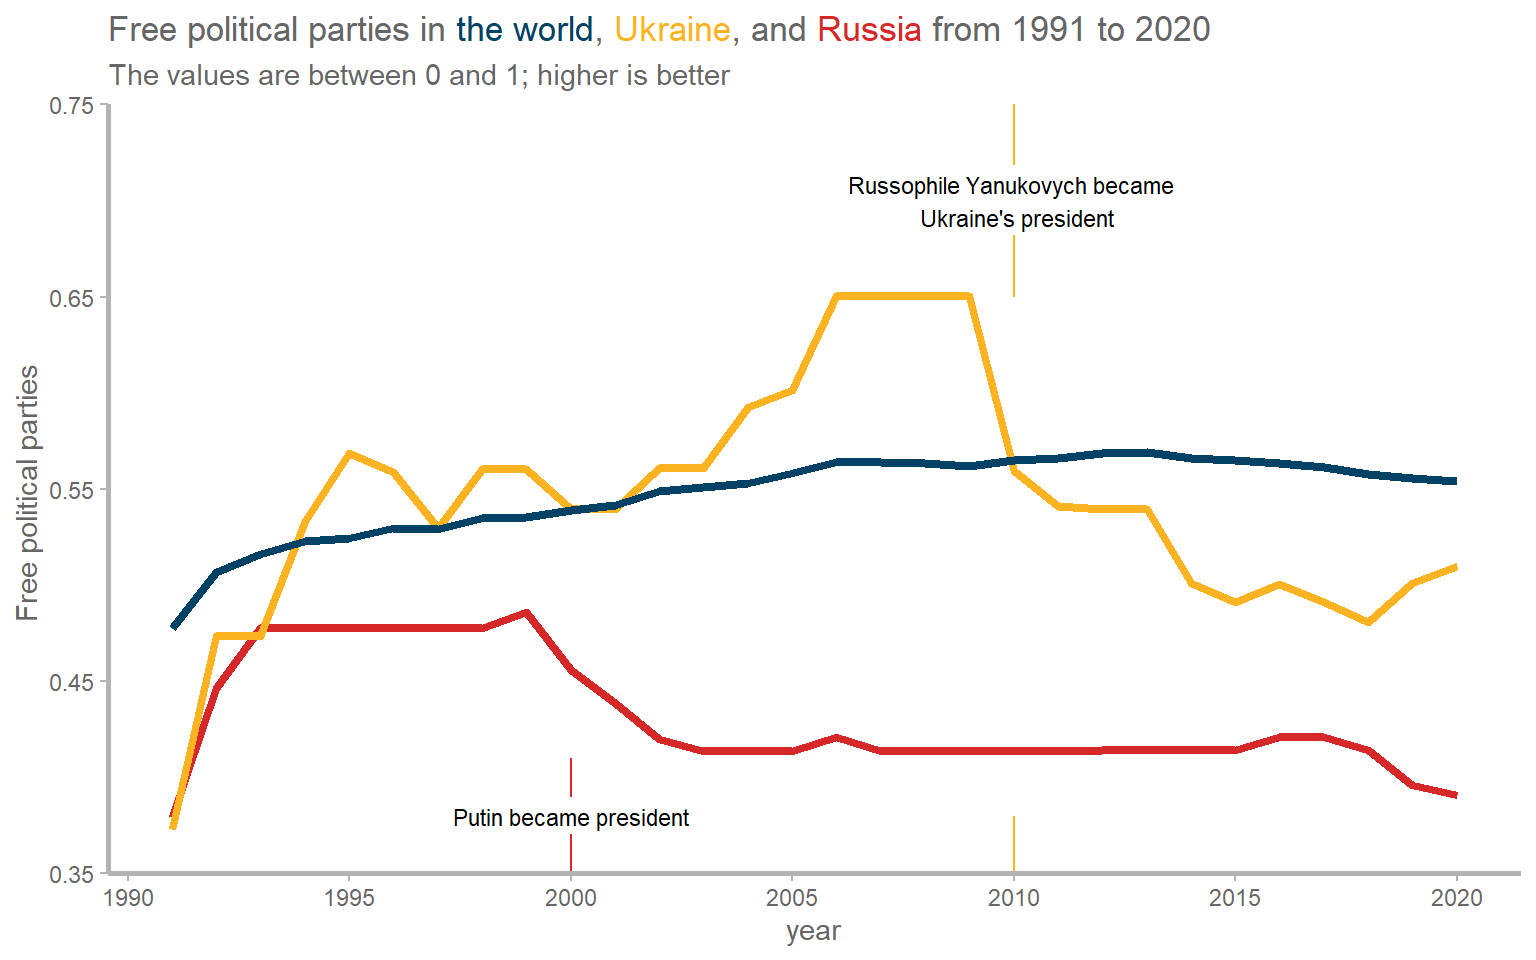

Yanukovych’s presidency was a turning point for the freedom of political
parties in Ukraine. There are allegations of attempts to destroy the
opposition party during his term. In Russia, after Putin became the
leader, opposition to his own party became more restricted.

### <span class="header-section-number">4.1.4</span> Elected government

The elected government subattribute denotes the extent to which national
and representative government offices are filled through elections. All
the indicators have a rather formal focus, which means that they do not
assess the quality of elections or fully capture the extent to which
reserved domains and undue influence from non-elected groups might in
practice restrict elected officials’ effective power to govern.

``` r
graph_index("elected_government_A1") +
  geom_segment(aes(x = rep(2014,2),
                   y = c(1, 0.5),
                   xend = rep(2014,2),
                   yend = c(1.1, 0.55)
                   ),
               color = "#FCB322"
               ) +
  geom_label(aes(x = 2014, 
                 y = 1.05,
                 label = "Independence of Crimea,\nDonetsk and Luhansk"
                 ),
             label.size = NA,
             size = 3
             )
```

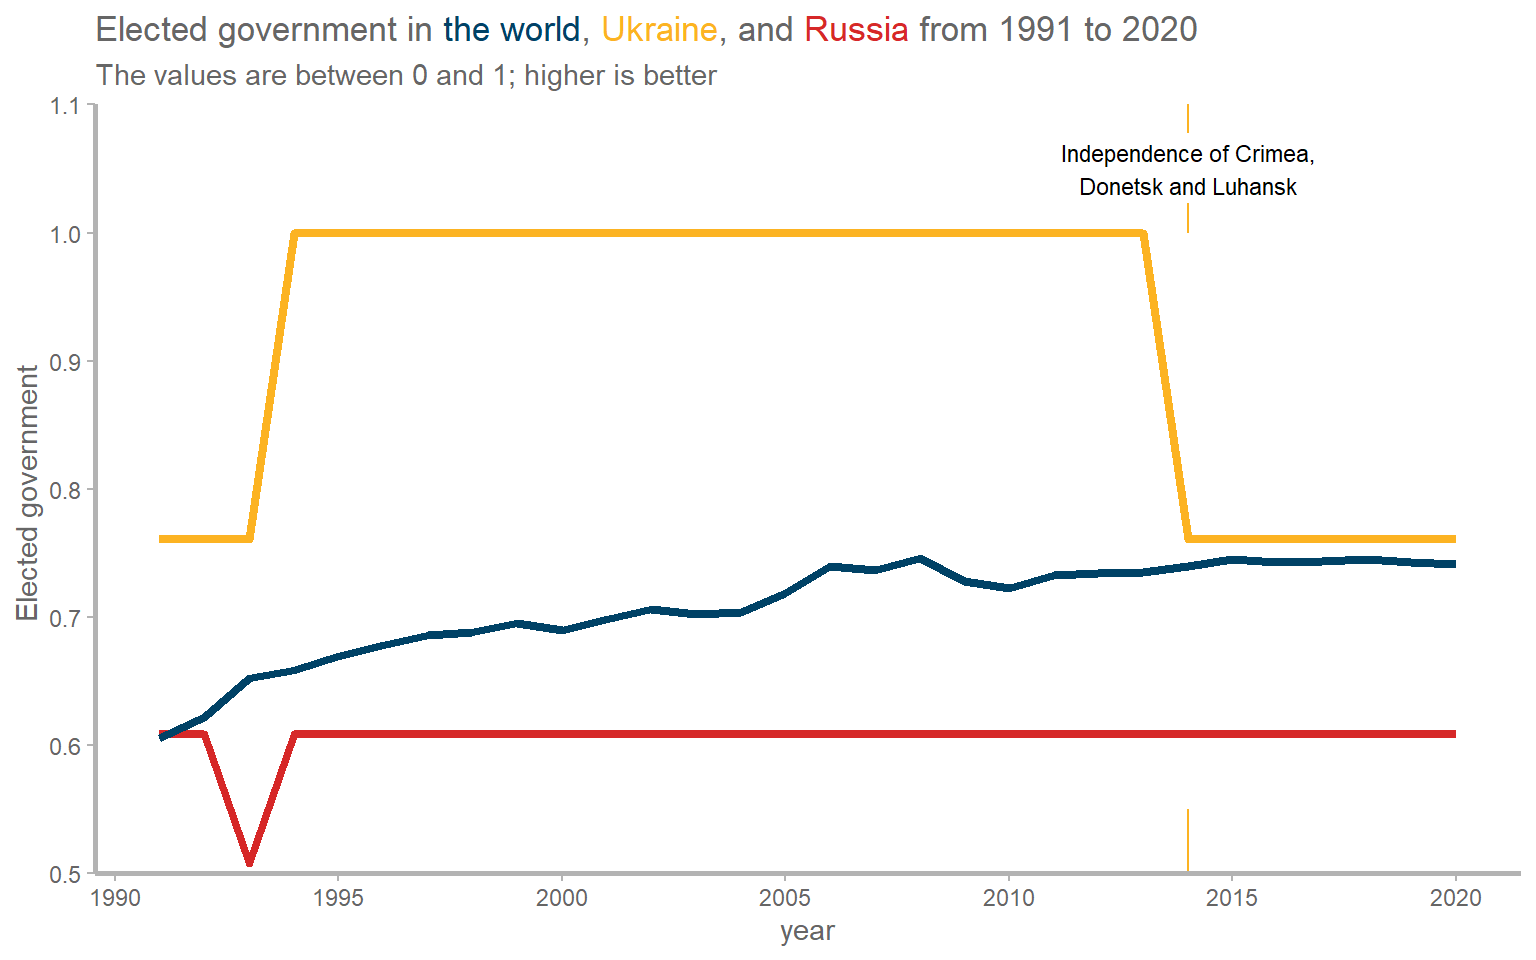

Aside from the Independence of Crimea, Donetsk, and Luhansk in 2014 Both
countries experienced a constant state of the elected government
subattribute.

## <span class="header-section-number">4.2</span> Fundamental rights

Fundamental Rights in the form of liberal and social rights support both
fair representation and the vertical mechanism of accountability that
the first attribute seeks to achieve. This attribute is composed of
three subattributes: access to justice, civil liberties, and social
rights and equality. Each of these three attributes is divided into
several subcomponents which are presented in the notebook.

### <span class="header-section-number">4.2.1</span> Freedom of expression

The freedom of expression subcomponent is measured using indicators from
[V-Dem](https://v-dem.net),
[CLD](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TKJWX),
and [CIRIGHTS](http://www.humanrightsdata.com/). The questions
underlying the CLD and CIRIGHTS variables are fairly encompassing,
whereas the V-Dem variables are more specific and refer to different
aspects of media freedom and to the right to openly discuss political
issues and express political opinions outside the mass media.

``` r
Ukraine_seg = tibble(x = rep(c(2004, 2005, 2010, 2014), 2),
                     y = c(rep(0.67, 4), rep(0.35, 4)),
                     xend = rep(c(2004, 2005, 2010, 2014), 2),
                     yend = c(rep(0.78, 4), rep(0.38, 4))
                     )
graph_index("freedom_of_expression_A2") +
  geom_segment(data = Ukraine_seg,
               aes(x = x, y = y, xend = xend, yend = yend),
               color = "#FCB322"
               ) +
  geom_segment(aes(x = 2000, y = 0.35, xend = 2000, yend = 0.45),
               color = "#D62828"
               ) +
  geom_label(aes(x = c(2004, 2007.5, 2014),
                 y = rep(0.72, 3),
                 label = c("Orange\nRevolution",
                           "Yushchenko's\npresidency",
                           "Revolution of Dignity;\nIndependence of Crimea,\nDonetsk and Luhansk")
                 ),
             label.size = NA,
             size = 3,
             label.padding = unit(0, "lines")
             ) +
  geom_label(aes(x = 2000, y = 0.4, label = "Putin took office"),
             label.size = NA,
             size = 3
             )
```

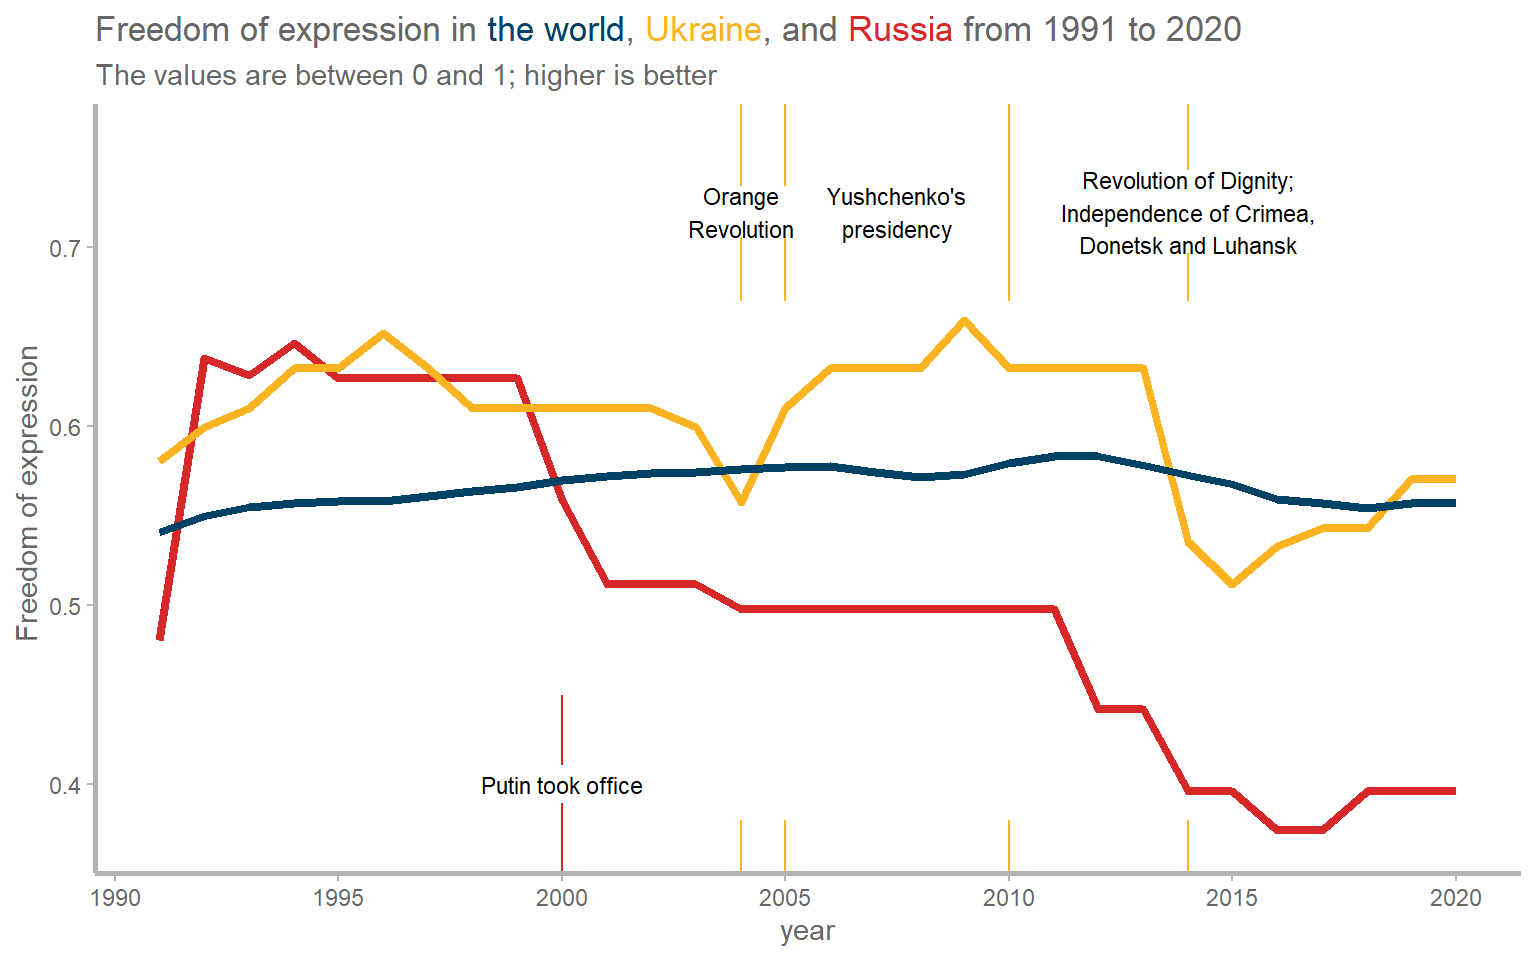

After a period of stability in Russia, Putin made Russia a worse place
for freedom of expression. Following [The Orange
Revolution](https://en.wikipedia.org/wiki/Orange_Revolution) in Ukraine,
freedom of expression became more restricted. It bounced back under
Yushchenko’s presidency but again deteriorated after [The Revolution of
Dignity](https://en.wikipedia.org/wiki/Revolution_of_Dignity) in 2014.

### <span class="header-section-number">4.2.2</span> Freedom of association and assembly

This subcomponent is an aggregate of six indicators that directly refer
to freedom of association for political and civil groups. These six
indicators were aggregated into the freedom of association and assembly
subcomponent using [item response
theory](https://en.wikipedia.org/wiki/Item_response_theory).

``` r
Ukraine_seg = tibble(x = rep(c(2004, 2005, 2010, 2014), 2),
                     y = c(rep(0.7, 4), rep(0.35, 4)),
                     xend = rep(c(2004, 2005, 2010, 2014), 2),
                     yend = c(rep(0.84, 4), rep(0.4, 4))
                     )

graph_index("freedom_of_association_and_assembly_A2") +
  geom_segment(data = Ukraine_seg,
               aes(x = x, y = y, xend = xend, yend = yend),
               color = "#FCB322"
               ) +
  geom_segment(aes(x = 2000, y = 0.35, xend = 2000, yend = 0.45),
               color = "#D62828"
               ) +
  geom_label(aes(x = c(2004, 2007.5, 2014),
                 y = rep(0.77, 3),
                 label = c("Orange\nRevolution",
                           "Yushchenko's\npresidency",
                           "Revolution of Dignity;\nIndependence of Crimea,\nDonetsk and Luhansk ")
                 ),
             label.size = NA,
             size = 3,
             label.padding = unit(0, "lines")
             ) +
  geom_label(aes(x = 2000, y = 0.4, label = "Putin took office"),
             label.size = NA,
             size = 3
             )
```

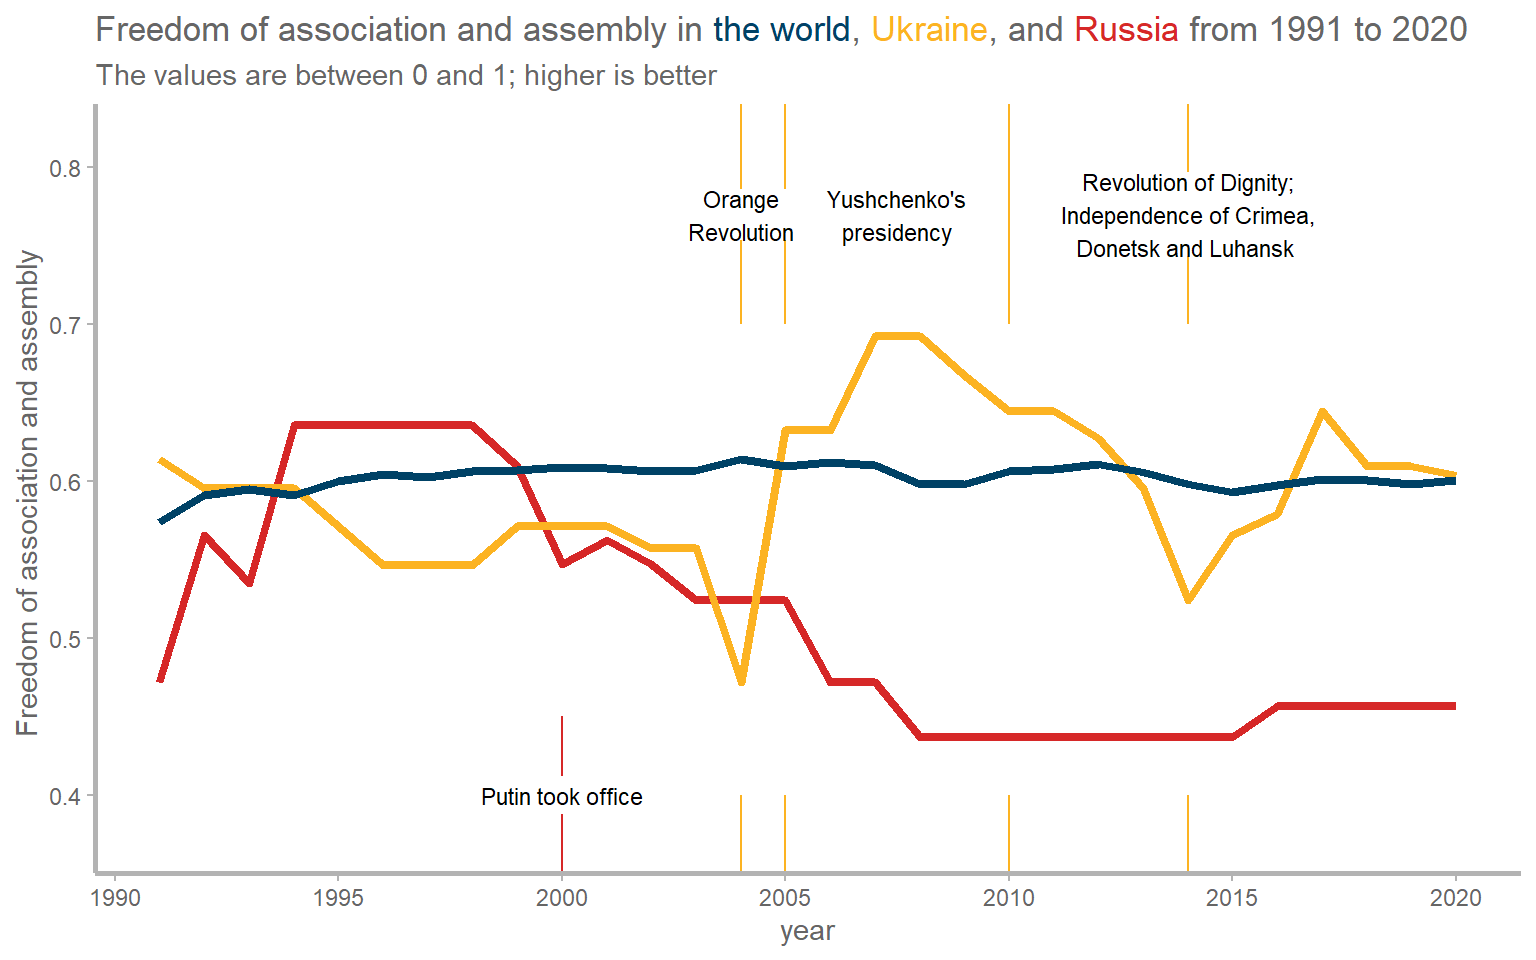

It seems freedom of expression and freedom of association and assembly
are highly correlated. The trends and turning points are much the same
as what we saw in the previous graph.

### <span class="header-section-number">4.2.3</span> Freedom of religion

A separate subcomponent index comprised of two V-Dem general indicators
on religious freedom based on expert surveys and two similarly broad
in-house coded variables from CLD and CIRIGHTS. The four indicators were
aggregated into the freedom of religion subcomponent using item response
theory.

``` r
graph_index("freedom_of_religion_A2") +
  expand_limits(y = c(0.3, 0.7))
```

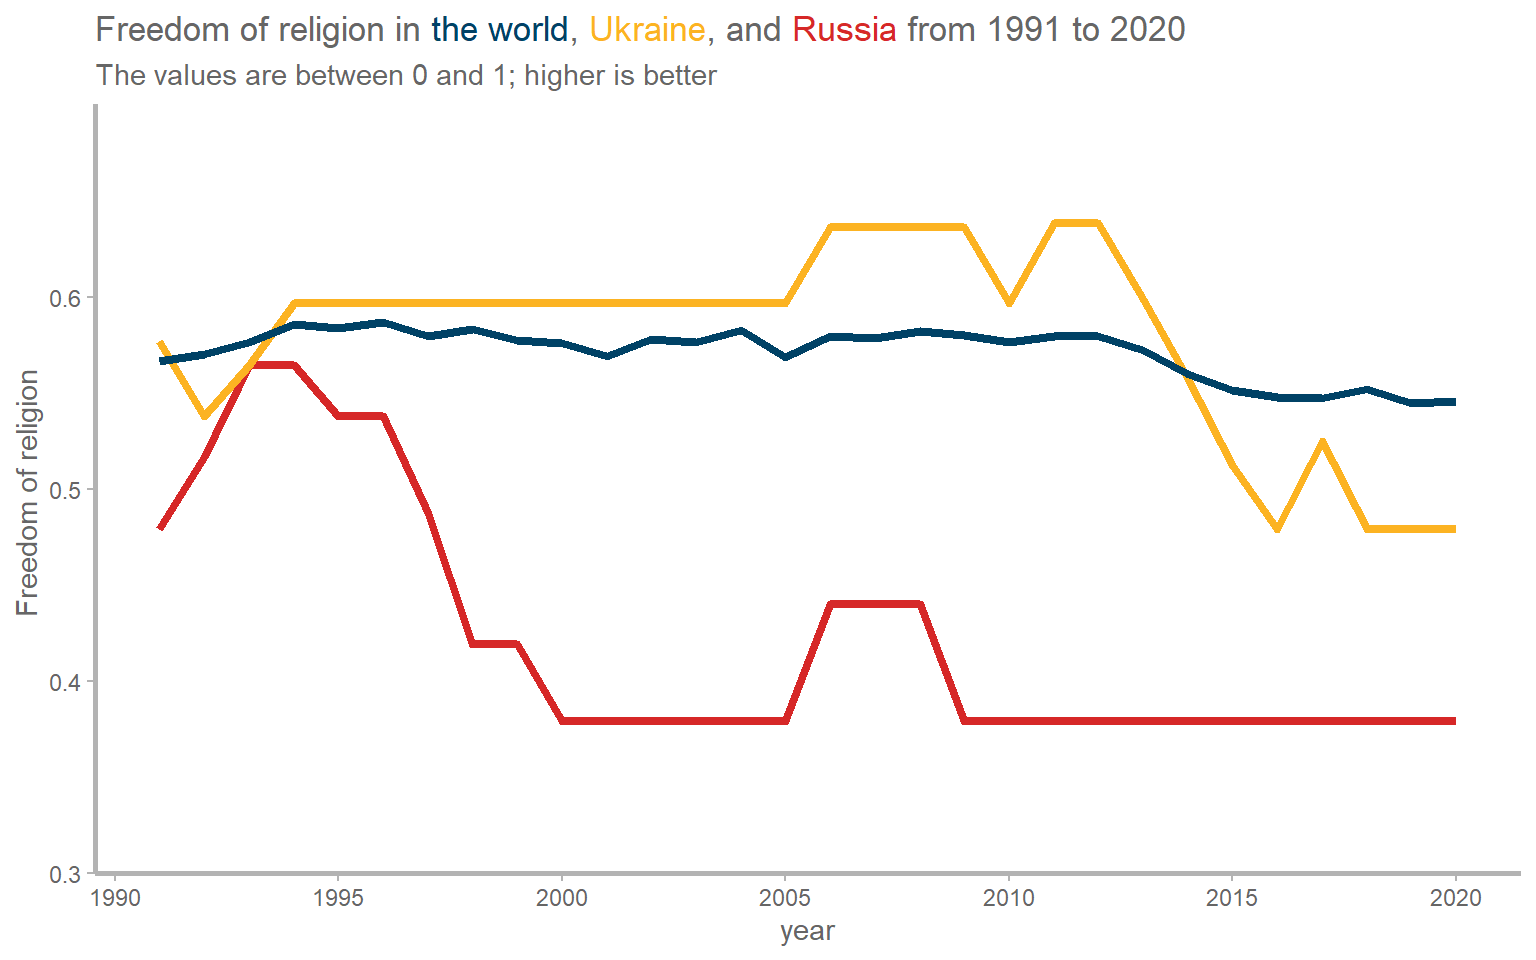

Aside from the period of 2012-2016 during which Ukraine’s freedom of
religion declined, both countries experienced a steady state of freedom
of religion in the last 20 years.

### <span class="header-section-number">4.2.4</span> Freedom of movement

Freedom of movement was captured by a general, in-house coded indicator
from CLD, two specific in-house coded indicators from CIRIGHTS and
three, more specific, expert coded indicators from V-Dem that
distinguish between foreign and domestic movement and provide
assessments of the latter feature for men and women. The six indicators
were aggregated into the freedom of movement subcomponent using item
response theory.

``` r
graph_index("freedom_of_movement_A2") +
  geom_segment(aes(x = rep(c(2010, 2014), 2),
                   y = c(rep(0.9, 2), rep(0.4, 2)),
                   xend = rep(c(2010, 2014), 2),
                   yend = c(rep(0.95, 2), rep(0.45, 2))
                   ),
                color = "#FCB322"
               ) +
  geom_label(aes(x = 2012,
                 y = 0.92,
                 label = "Yanukovych's\npresidency"
                 ),
             label.size = NA,
             label.padding = unit(0, "lines"),
             size = 3
             )
```

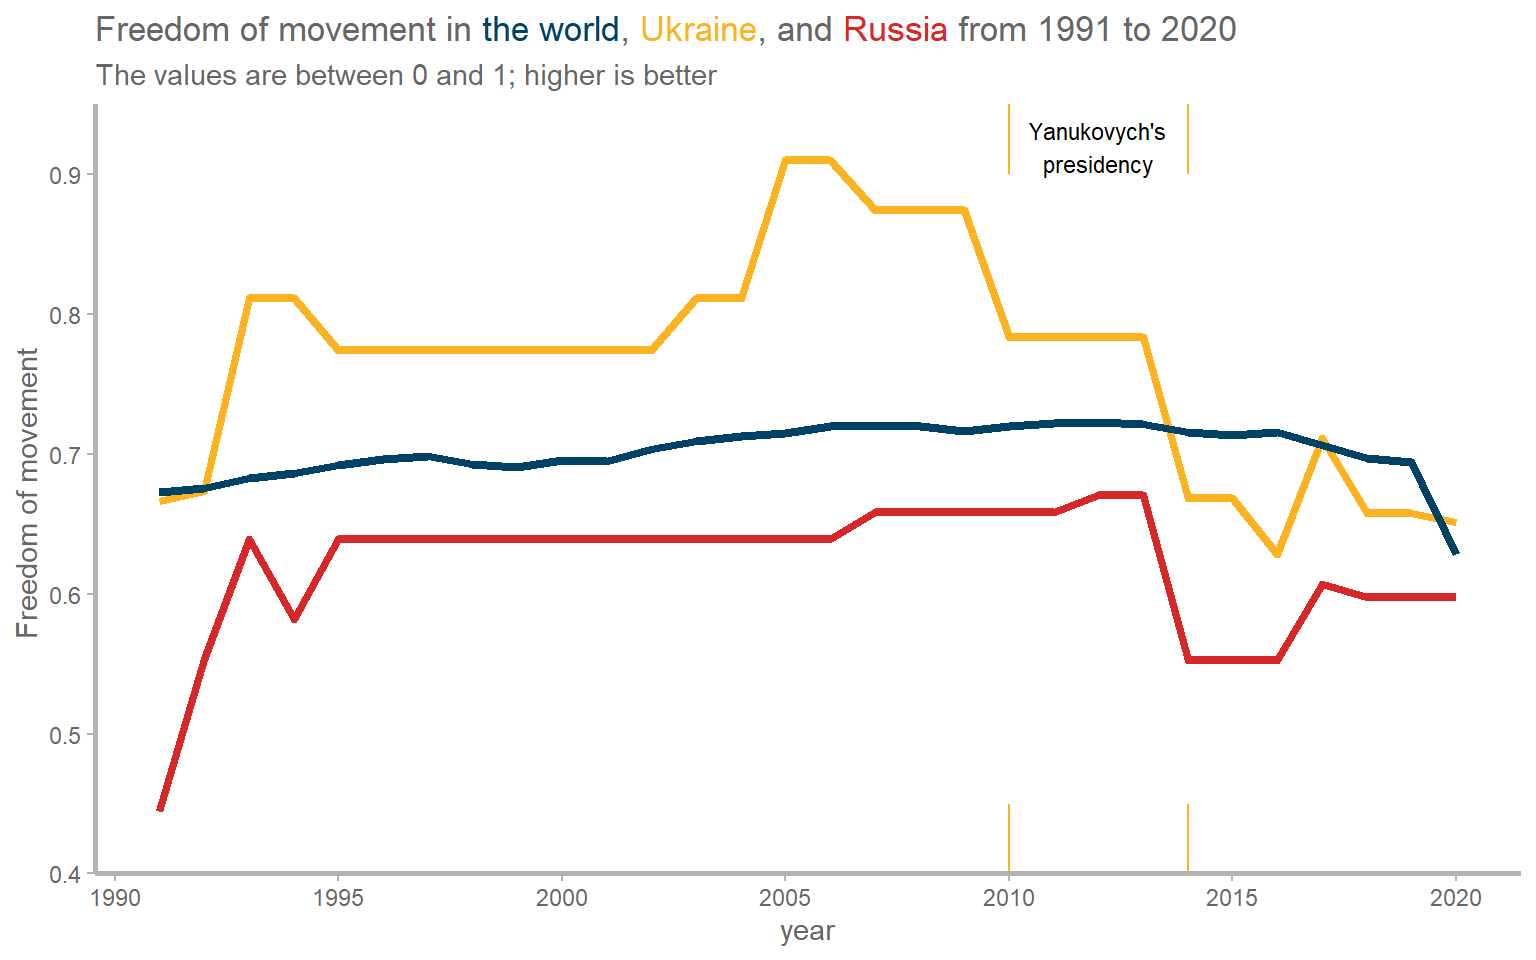

We can detect a significant decreasing pattern for Ukraine’s freedom of
movement under Yanukovych’s administration. Surely, it is not a
coincidence that his last year in office triggered the Revolution of
Dignity and caused a further curtailment of freedom of movement in both
countries.

### <span class="header-section-number">4.2.5</span> Personal integrity and security

Five indicators capture different types of violations, such as forced
labor, torture, and political and extra-judicial disappearances and
killings. To capture personal security more broadly, two general
indicators on political violence and physical integrity rights were also
included, which pertain to different types of human rights violations,
conflict and, violence and distinguishes between various levels. The
seven indicators were aggregated into the personal integrity and
security subcomponent using item response theory.

``` r
graph_index("personal_integrity_and_security_A2") +
  geom_segment(aes(x = rep(c(2005, 2014), 2),
                   y = c(rep(0.52, 2), rep(0.25, 2)),
                   xend = rep(c(2005, 2014), 2),
                   yend = c(rep(0.58, 2), rep(0.28, 2))
                   ),
                 color = "#FCB322"
               ) +
  geom_label(aes(x = c(2005, 2014),
                 y = rep(0.55, 2),
                 label = c("Yushchenko became\npresident",
                           "The Dignity Revolution")
                 ),
             label.size = NA,
             size = 3
             )
```

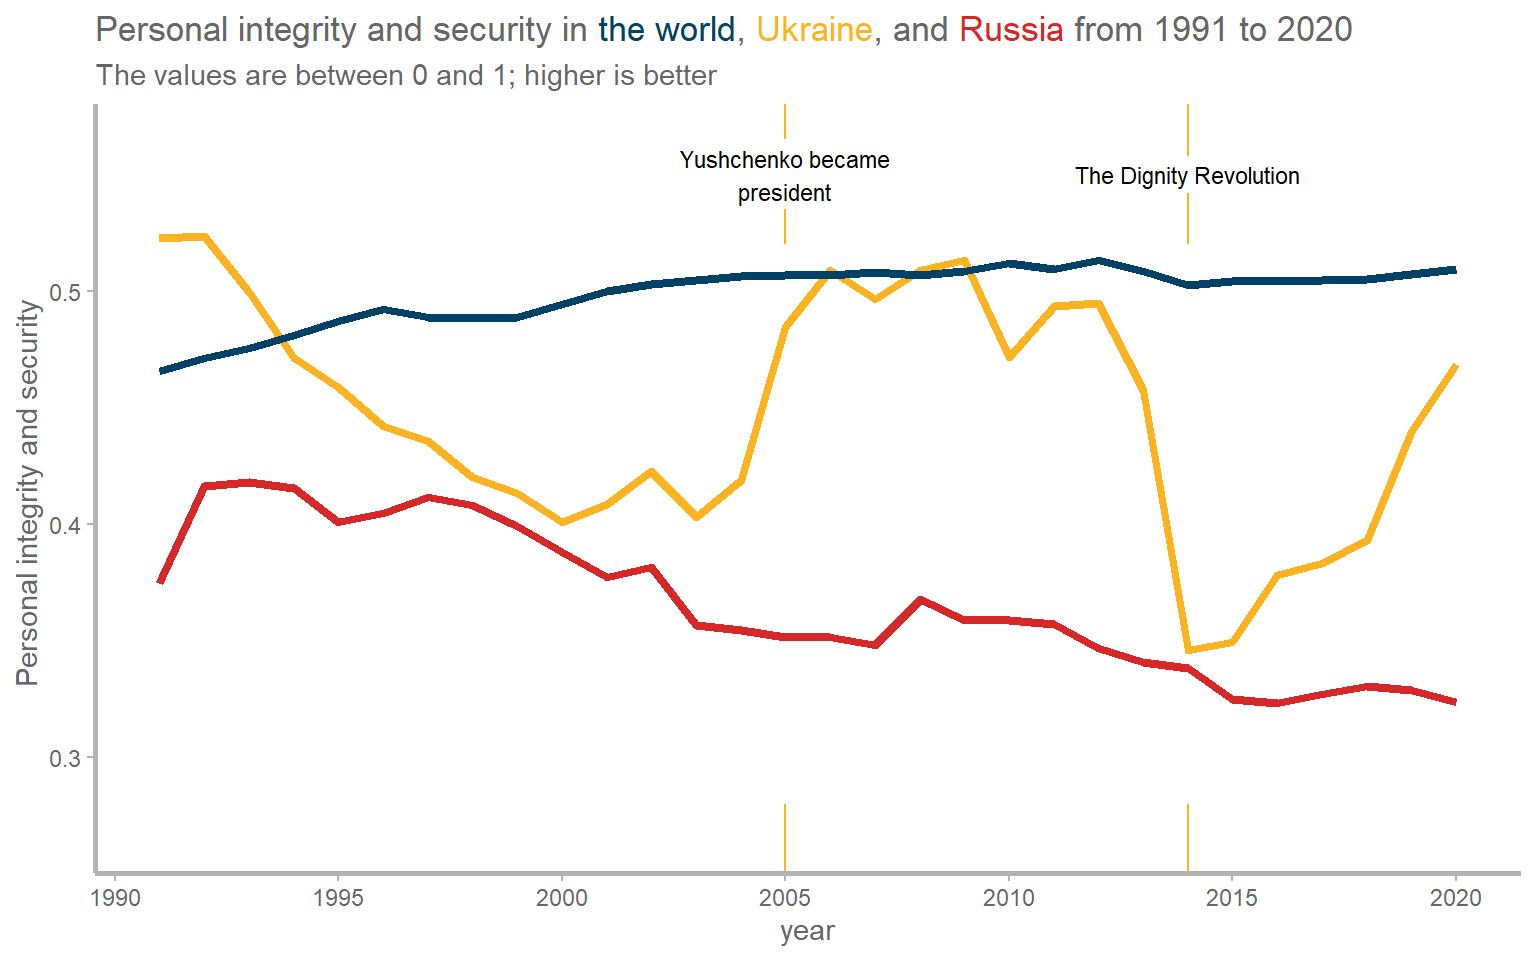

Ukraine’s state of personal integrity and security reached its peak
after Yushchenko took the office, then it descended to its valley after
The Revolution of Dignity. In Russia, the value is decreasing constantly
with a small slope.

### <span class="header-section-number">4.2.6</span> Social group equality

Five V-Dem expert-coded indicators and four V-Dem indices were used to
measure social group equality, the first of the social rights and
equality subcomponents. Four of the underlying questions ask about
social class and identity group inequalities with regard to civil
liberties and political power distribution. The fifth asks about the
representation of disadvantaged social groups. Four indices provide
measures of socio-economic, political, social and urban-rural exclusion.
One additional indicator from [International Country Risk Guider
(ICRG)](https://www.prsgroup.com/explore-our-products/international-country-risk-guide/)
reflects the extent of religious and/or ethnic tensions. The ten
indicators were aggregated into the social group equality subcomponent
using item response theory.

``` r
graph_index("social_group_equality_A2") +
  geom_segment(aes(x = rep(2014, 2),
                   y = c(0.62, 0.45),
                   xend = rep(2014, 2),
                   yend = c(0.7, 0.47)
                   ),
               color = "#FCB322"
               ) +
  geom_label(aes(x = 2014,
                 y = 0.66,
                 label = "The independence of\nCrimea, Donetsk and Luhansk"
                 ),
             label.size = NA,
             size = 3
             )
```

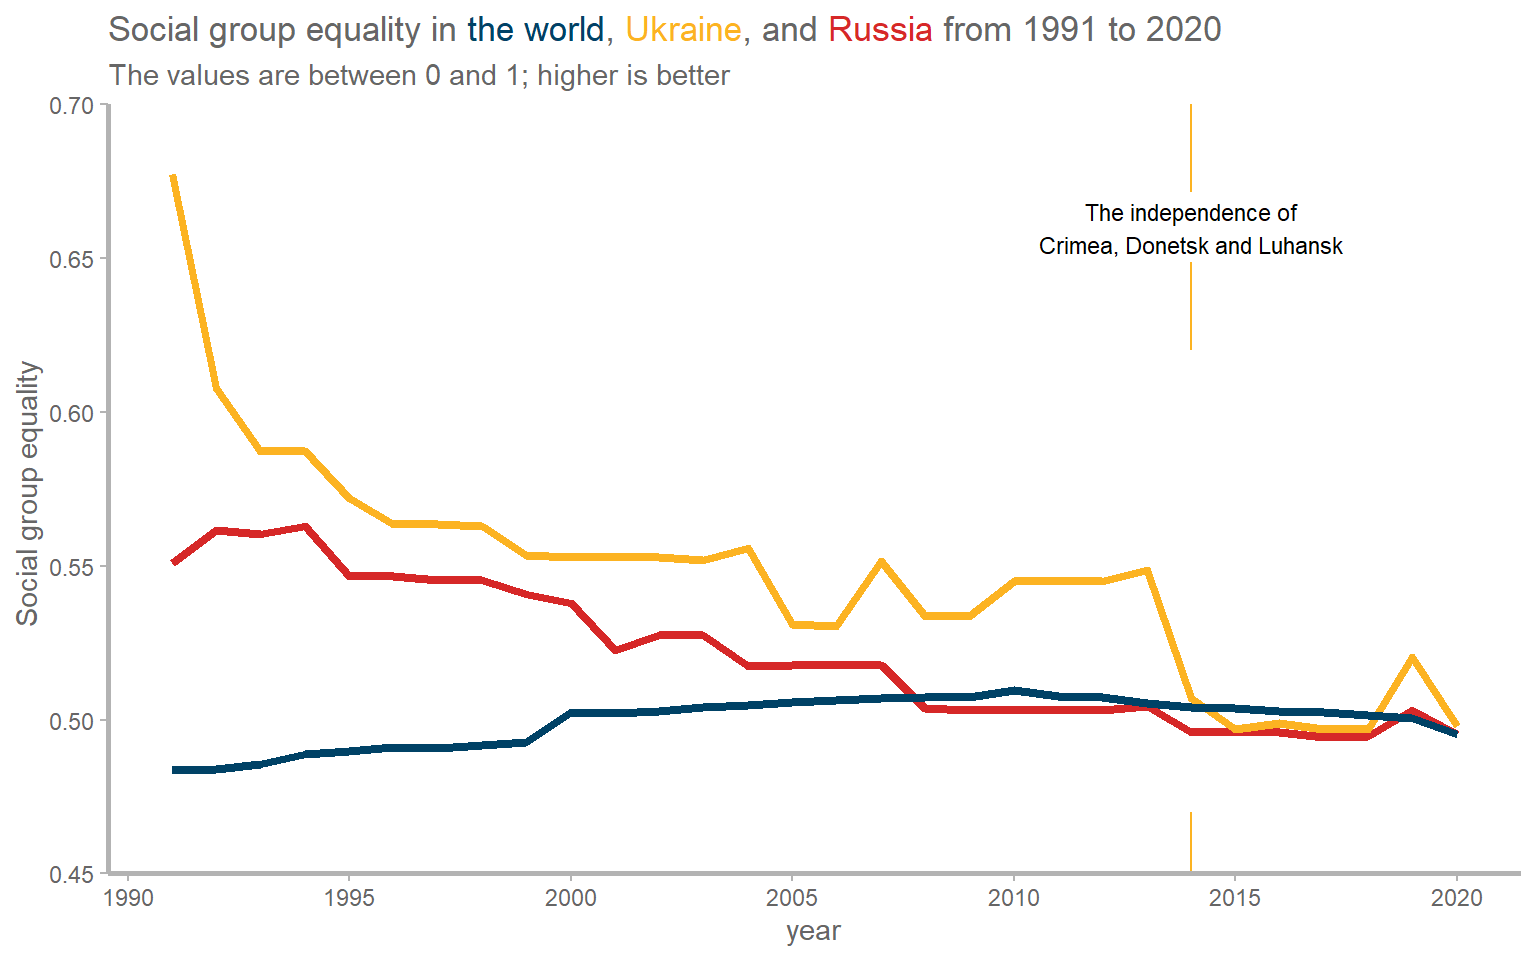

The social group equality state has consistently deteriorated after the
dissolution of the Soviet Union in 1991. Moreover, the situation became
worse in Ukraine after the independence of Crimea, Donetsk, and Luhansk.

### <span class="header-section-number">4.2.7</span> Basic welfare

The provision of basic welfare is measured using standard observable
human development indicators: infant mortality rate, life expectancy,
kilocalories per person per day, literacy rate and average years of
schooling. In addition, two expert-based indicators from V-Dem were
included that assess whether everyone in a given society has access to
basic education and health care. All the indicators reflect the extent
to which the basic needs of the population are being met. The seven
indicators were aggregated into the basic welfare subcomponent using
item response theory.

``` r
graph_index("basic_welfare_A2") +
  geom_segment(aes(x = 2014,
                   y = 0.4,
                   xend = 2014,
                   yend = 0.5
                   ),
               color = "#FCB322"
               ) +
  geom_label(aes(x = 2017,
                 y = 0.45,
                 label = "Poroshenko &\nZelenskyy"
                 ),
             label.size = NA,
             size = 3,
             label.padding = unit(0, "lines")
             )
```

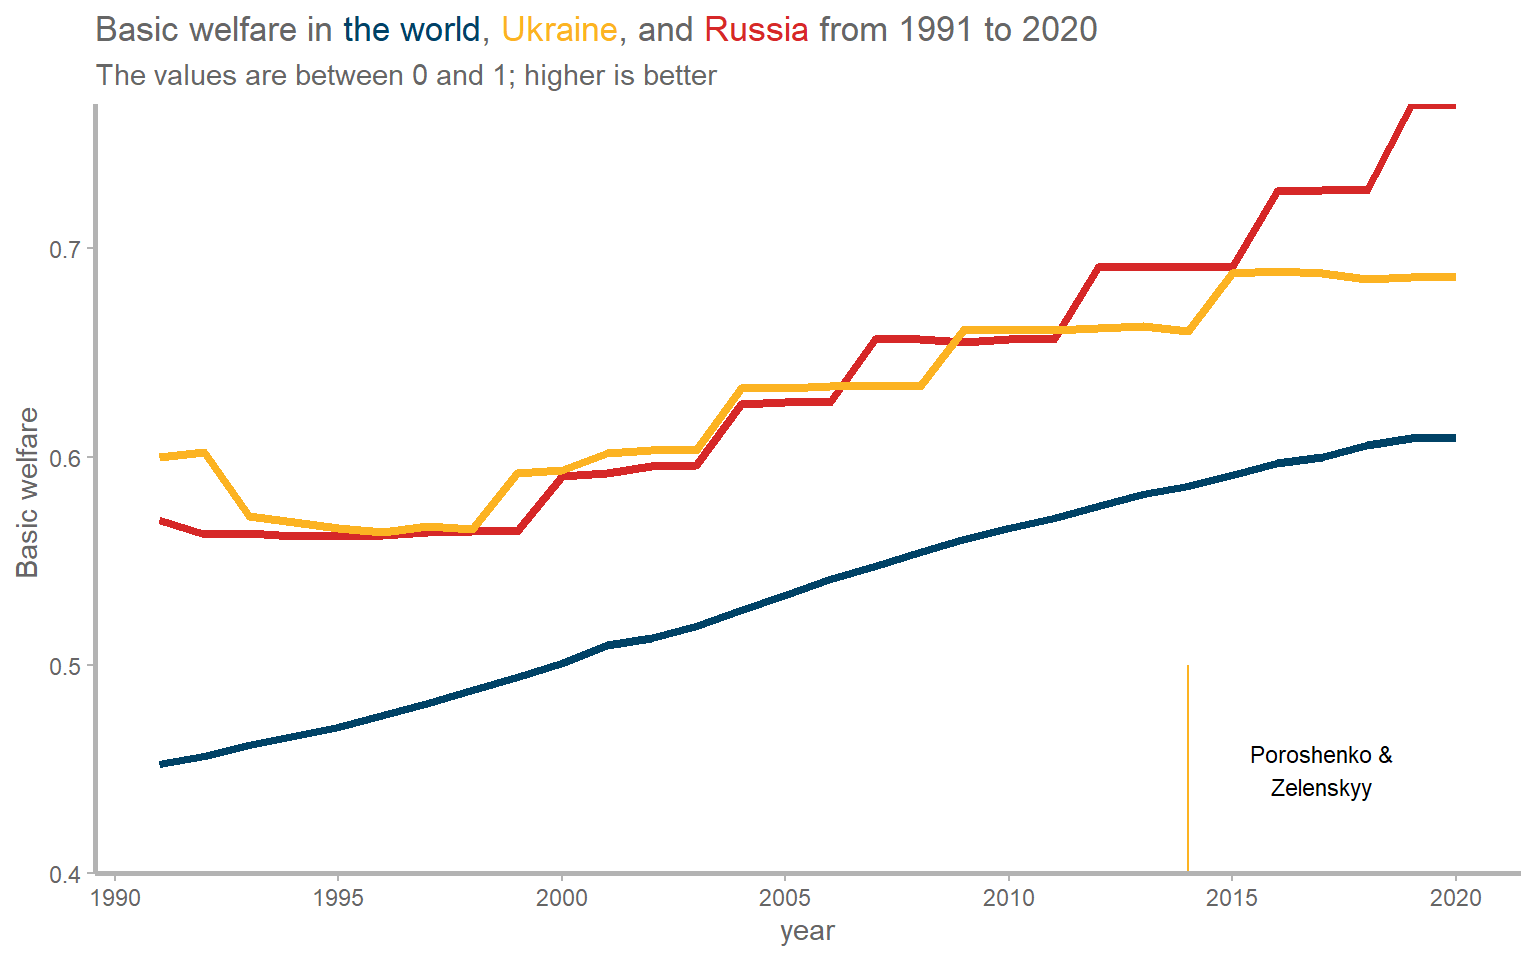

Both countries improved their basic welfare in the past 30 years, and
are ahead of the world’s average in this regard. However, Ukraine
started to lag behind Russia after Poroshenko’s presidency.

### <span class="header-section-number">4.2.8</span> Gender equality

Three expert-coded indicators from V-Dem were used to operationalize
gender equality—power distribution by gender, female participation in
civil society organizations and gender-based exclusion—as well as two
expert-coded indicators from CIRIGHTS on women’s political and economic
rights. Two observational indicators are also included on the ratio
between female and male mean years of schooling
([IHME](https://www.healthdata.org/)), and the proportion of lower
chamber female legislators (V-Dem). The seven indicators were aggregated
into the gender equality subcomponent using item response theory.

``` r
graph_index("gender_equality_A2") +
  geom_segment(aes(x = rep(c(2005, 2010), 2),
                   y = c(rep(0.75, 2), rep(0.45, 2)),
                   xend = rep(c(2005, 2010), 2),
                   yend = c(rep(0.78, 2), rep(0.47, 2))
                   ),
               color = "#FCB322"
               ) +
  geom_label(aes(x = 2007.5,
                 y = 0.765,
                 label = "Yushchenko's\npresidency"
                 ),
             label.size = NA,
             size = 3,
             label.padding = unit(0, "lines")
             )
```

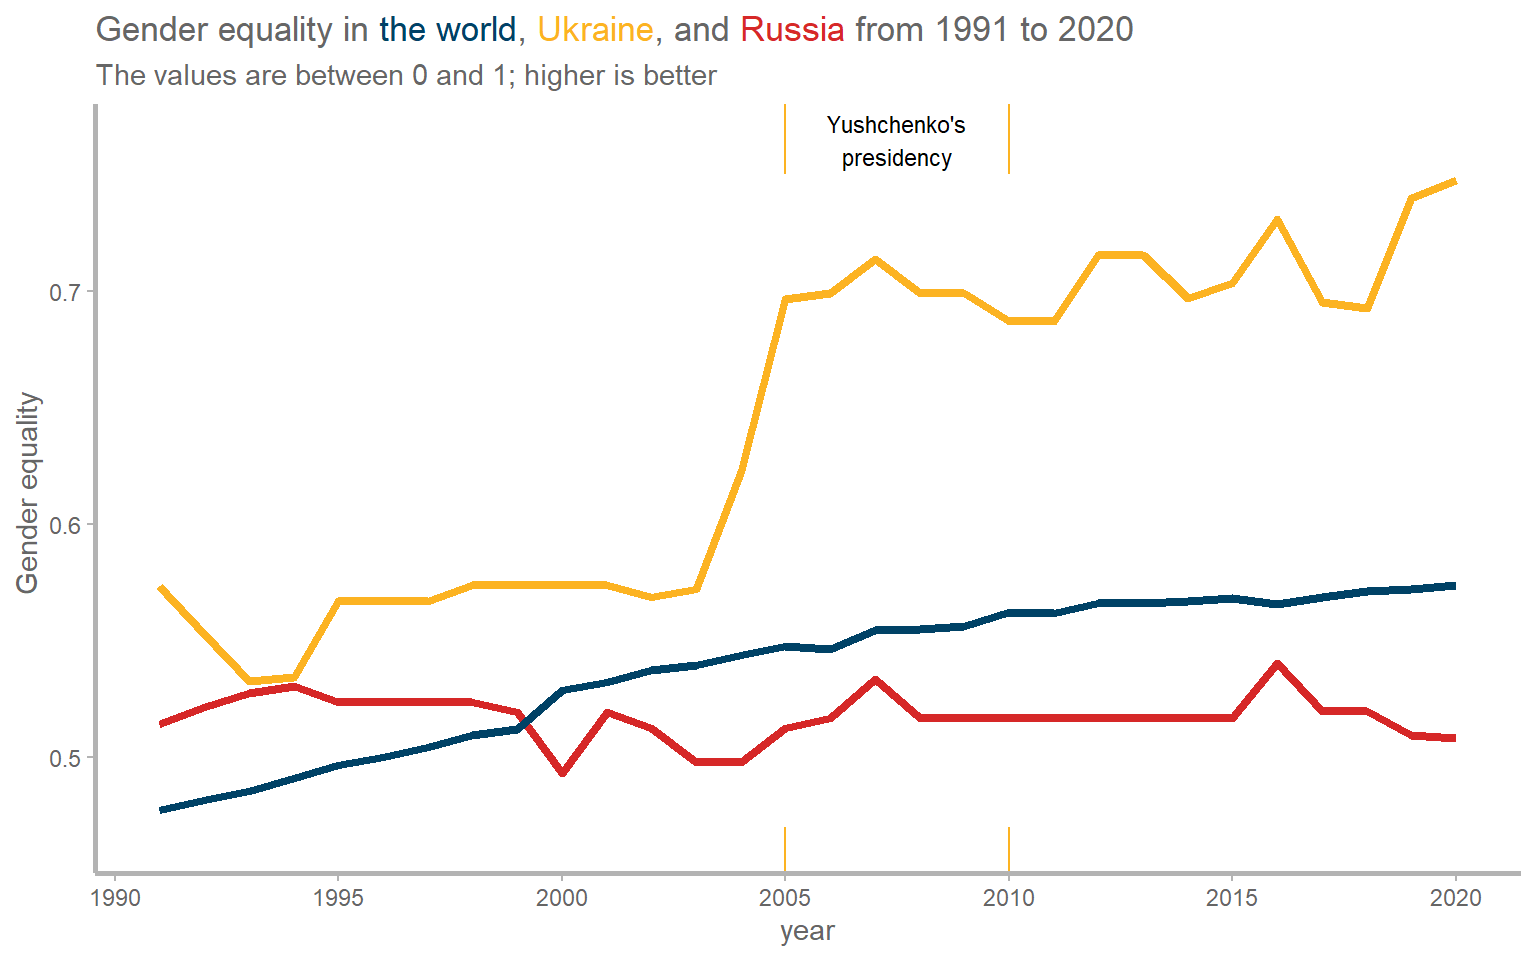

Yushchenko’s presidency was a great leap for gender equality in Ukraine.
He struggled to adopt the EU’s gender equality standards in Ukraine. In
comparison to Ukraine, Russia’s gender equality during Putin-era is
inferior but stable.

## <span class="header-section-number">4.3</span> Checks on government

Besides regular elections, the exercise of political power needs to be
continuously subjected to scrutiny. If the other branches of government
(the legislature and the judiciary) or a critical and pluralistic press
do not check executive power, they are more prone to be abused for
private gain and too biased political decision-making and
implementation. Vertical accountability through elections should be
supplemented by horizontal accountability between elections. The three
subattributes were aggregated into the Checks on Government index using
[Bayesian factor analysis](https://en.wikipedia.org/wiki/Bayes_factor).

### <span class="header-section-number">4.3.1</span> Effective parliament

The effectiveness of parliament subattribute denotes the extent to which
the legislature is capable of overseeing the executive. It includes
three indicators from the V-Dem experts’ survey that tap fairly directly
into the effectiveness of parliament. Another V-Dem indicator on
executive oversight and the executive constraints indicator from Polity
are included as they capture relevant aspects of institutional Checks on
Government not covered by judicial independence and media integrity. The
five indicators were aggregated into the media integrity subattribute
using item response theory.

``` r
graph_index("effective_parliament_A3") +
  geom_segment(aes(x = 2000, y = 0.3, xend = 2000, yend = 0.42),
               color = "#D62828"
               ) +
  geom_label(aes(x = 2000, 
                 y = 0.36,
                 label = "Putin became president"
                 ),
             label.size = NA,
             size = 3
             )
```

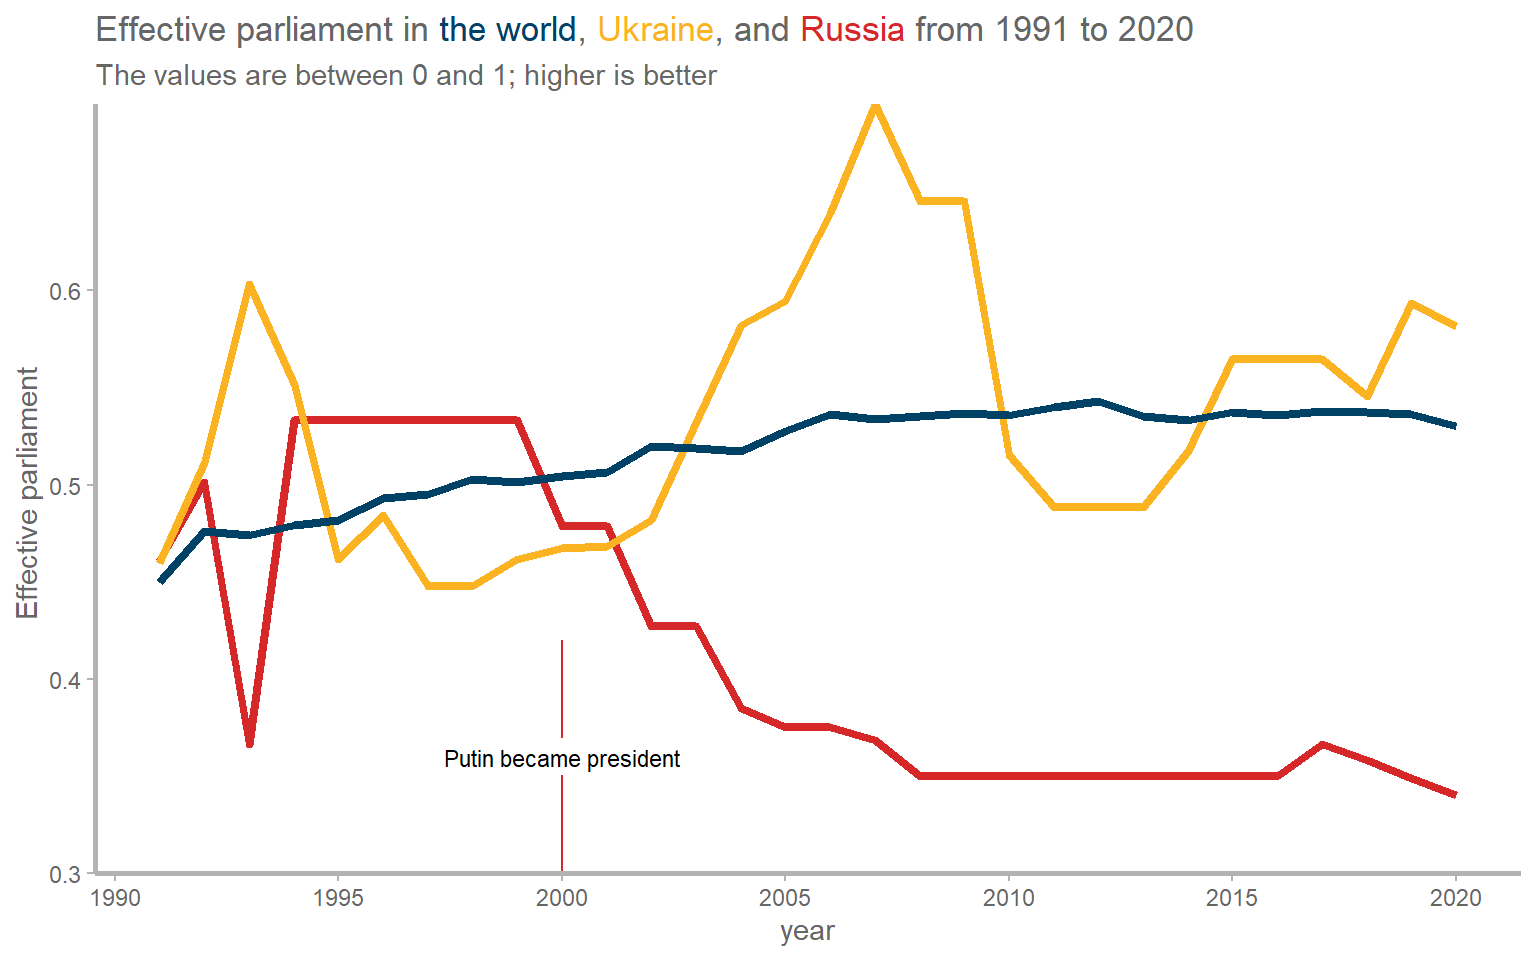

Although Ukraine’s state of effective parliament waxed and waned several
times Putin’s Russia didn’t fare as well as Ukraine in this
subattribute. As the latest data shows, Ukraine’s performance was far
better than Russia’s and on top of the world’s average.

### <span class="header-section-number">4.3.2</span> Judicial Independence

The judicial independence subattribute denotes the extent to which the
courts are not subject to undue influence from the other branches of
government, especially the executive. Since the current framework places
judicial independence under the attribute concerning Checks on
Government, it is important to supplement the four judicial independence
indicators with two indicators on government compliance with the courts.
The six indicators were aggregated into the media integrity subattribute
using item response theory.

``` r
graph_index("judicial_independence_A3") +
  geom_segment(aes(x = 2000, y = 0.1, xend = 2000, yend = 0.24),
               color = "#D62828"
               ) +
  geom_label(aes(x = 2000, 
                 y = 0.17,
                 label = "Putin became president"
                 ),
             label.size = NA,
             size = 3
             )
```

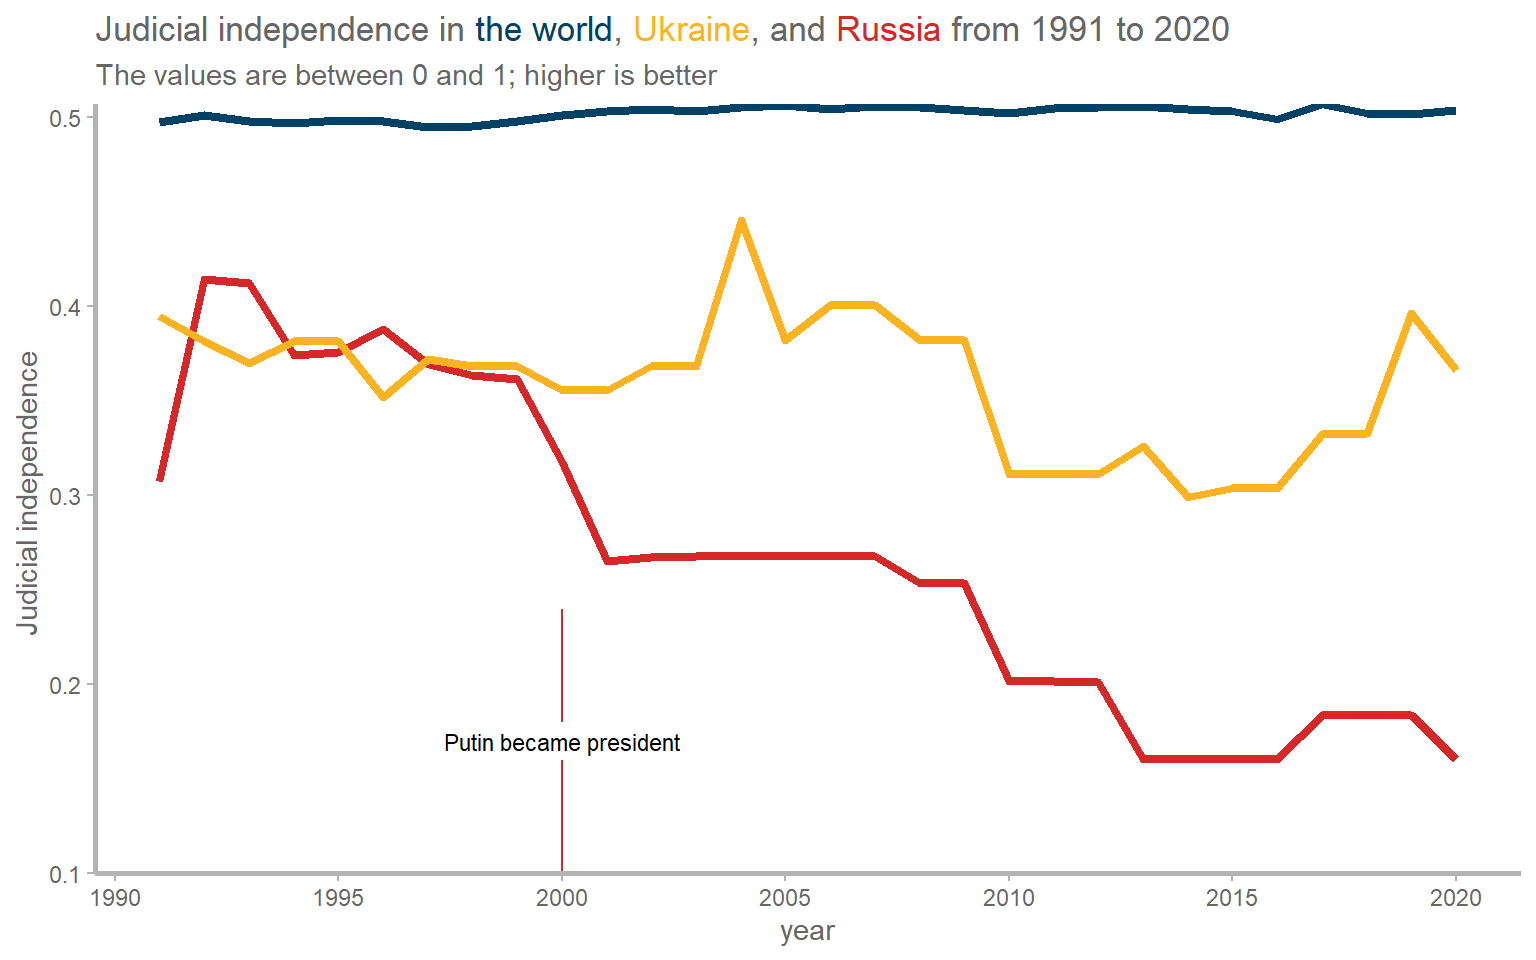

Unsurprisingly, Putin nearly annihilated judicial independence which is
a nuisance for a dictatorship. Ukraine did a better job than Russia, but
both are below the world’s average.

### <span class="header-section-number">4.3.3</span> Media integrity

The media integrity subattribute denotes the extent to which the media
landscape offers diverse and critical coverage of political issues.
Media integrity and freedom of expression are related. Nonetheless, the
media can do a poor job controlling the government even in a situation
of media freedom if they are very one-sided, uncritical, superficial or
corrupt. V-Dem offers indicators that reflect these additional
circumstances. These indicators are based on expert surveys in addition
to an in-house coded indicator from the [Global Media Freedom
Dataset](https://www.cambridge.org/core/journals/political-science-research-and-methods/article/abs/correlates-of-media-freedom-an-introduction-of-the-global-media-freedom-dataset/F9B43F3F909BD00302DB32C9BD4E05A3)
(MFD), which indicates whether the media are critical of the government
and its officials. The five indicators were aggregated into the media
integrity subattribute using Bayesian factor analysis.

``` r
Ukraine_seg <- tibble(x = rep(c(1994, 2005, 2010, 2014, 2019), 2),
                      y = c(rep(0.75, 5), rep(0.3, 5)),
                      xend = rep(c(1994, 2005, 2010, 2014, 2019), 2),
                      yend = c(rep(0.8, 5), rep(0.34, 5))
                      )
Ukraine_presidents <- tibble(x = c(1992.5, 2000, 2007.5, 2012, 2016.5, 2021),
                             y = rep(0.78, 6),
                             label = c("Kravchuk", "Kuchma", "Yushchenko",                                             "Yanukovych", "Poroshenko", "Zelenskyy")
                             )
                      
graph_index("media_integrity_A3") +
  geom_segment(data = Ukraine_seg, 
               aes(x = x, y = y, xend = xend, yend = yend),
               color = "#FCB322"
               ) +
  geom_segment(aes(x = 2000, y = 0.3, xend = 2000, yend = 0.44),
               color = "#D62828"
               ) +
  geom_label(aes(x = 2000, y = 0.37,
                 label = "Putin became president"
                 ),
             label.size = NA,
             size = 3
             ) +
  geom_label(data = Ukraine_presidents,
             aes(x = x,
                 y = y,
                 label = label
                 ),
             label.size = NA,
             size = 3,
             label.padding = unit(0, "lines")
             )
```

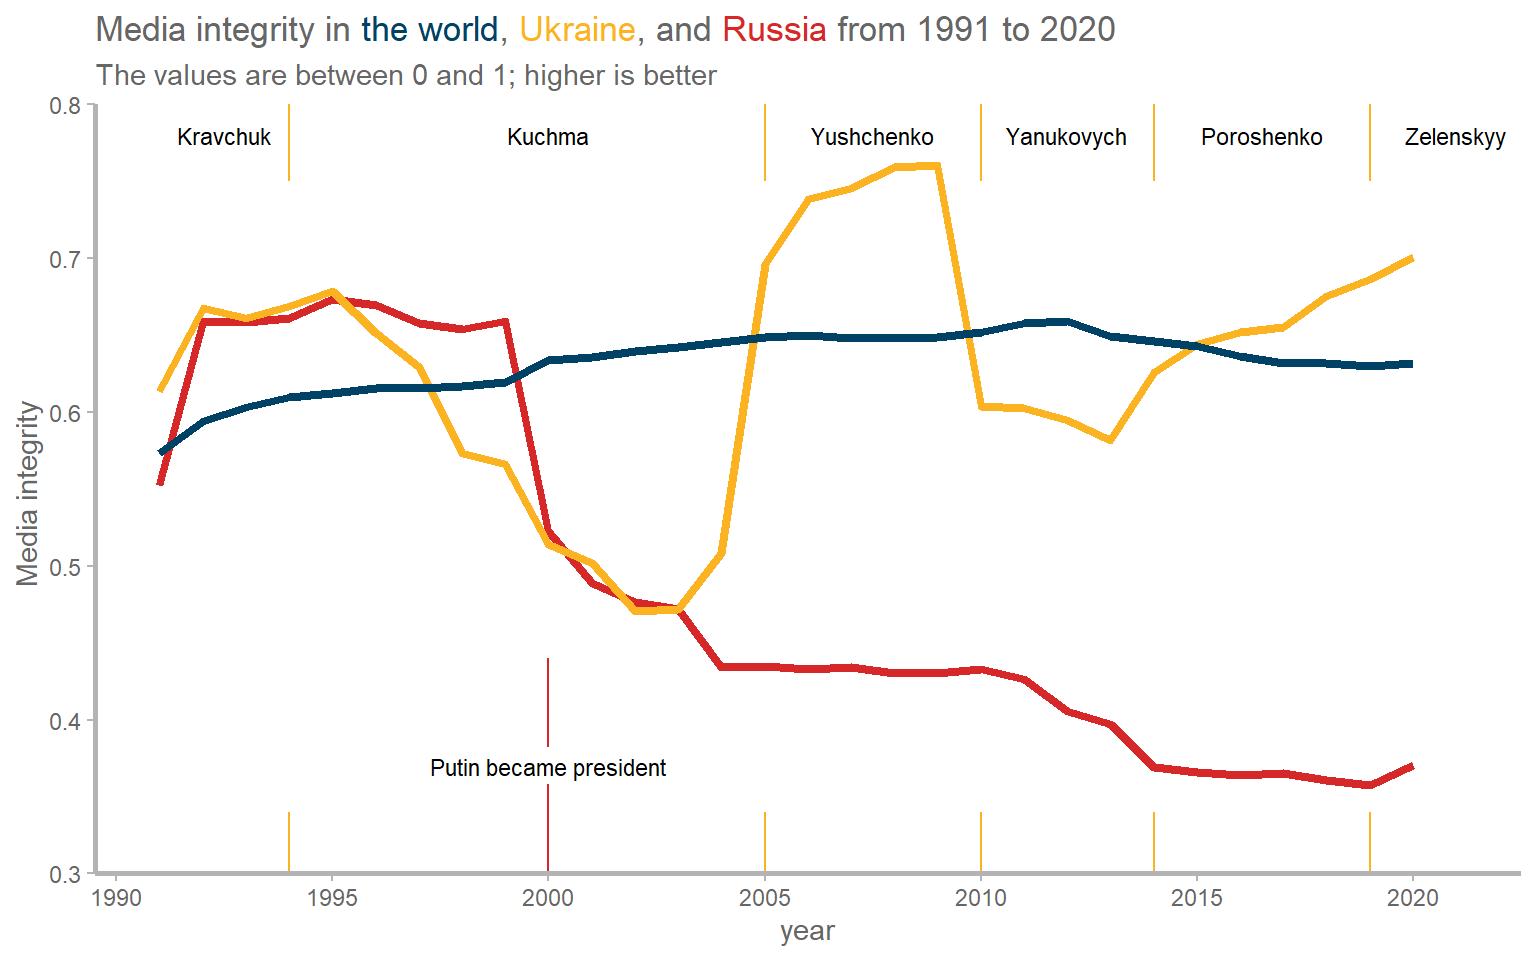

## <span class="header-section-number">4.4</span> Impartial administration

The government and the public administration more generally should
implement official public policies in an impartial manner. If the
implementation is unfair and unpredictable, large discrepancies between
official laws and policies, on the one hand, and practices, on the
other, undermine democratic principles. Thus, democracy is a matter not
only of access to power and control of power, but also of the exercise
of power. Since Impartial Administration to a large extent overlaps with
the concept of the rule of law, this attribute is also rooted in the
tradition that emphasizes the liberal aspects of democracy. The two
subattributes were aggregated into the Impartial Administration index
using Bayesian factor analysis.

### <span class="header-section-number">4.4.1</span> Absence of corruption

The absence of corruption subattribute denotes the extent to which the
executive and the public administration, more broadly, do not abuse
their office for personal gain. Four V-Dem indicators explicitly refer
to corruption in the government broadly understood, i.e., the executive
and public administration more generally (but excluding courts and
parliaments). In addition to these, the [Global State of
Democracy](https://www.idea.int/gsod/) makes use of another expert-coded
but broader indicator on government corruption from the [International
Country Risk
Guider](https://www.prsgroup.com/explore-our-products/international-country-risk-guide/)
(ICRG) data set. The five indicators have been aggregated into the
absence of corruption subattribute using item response theory.

``` r
Ukraine_seg <- tibble(x = rep(c(1994, 2005, 2010, 2014, 2019), 2),
                      y = c(rep(0.48, 5), rep(0.16, 5)),
                      xend = rep(c(1994, 2005, 2010, 2014, 2019), 2),
                      yend = c(rep(0.5, 5), rep(0.18, 5))
                      )

graph_index("absence_of_corruption_A4") +
  geom_segment(data = Ukraine_seg, 
               aes(x = x, y = y, xend = xend, yend = yend),
               color = "#FCB322"
               ) +
  geom_segment(aes(x = 2000, y = 0.16, xend = 2000, yend = 0.22),
               color = "#D62828"
               ) +
  geom_label(aes(x = 2000, y = 0.18,
                 label = "Putin became president"
                 ),
             label.size = NA,
             size = 3
             ) +
  geom_label(data = Ukraine_presidents,
             aes(x = x, y = 0.49, label = label),
             label.size = NA,
             size = 3,
             label.padding = unit(0, "lines")
             )
```

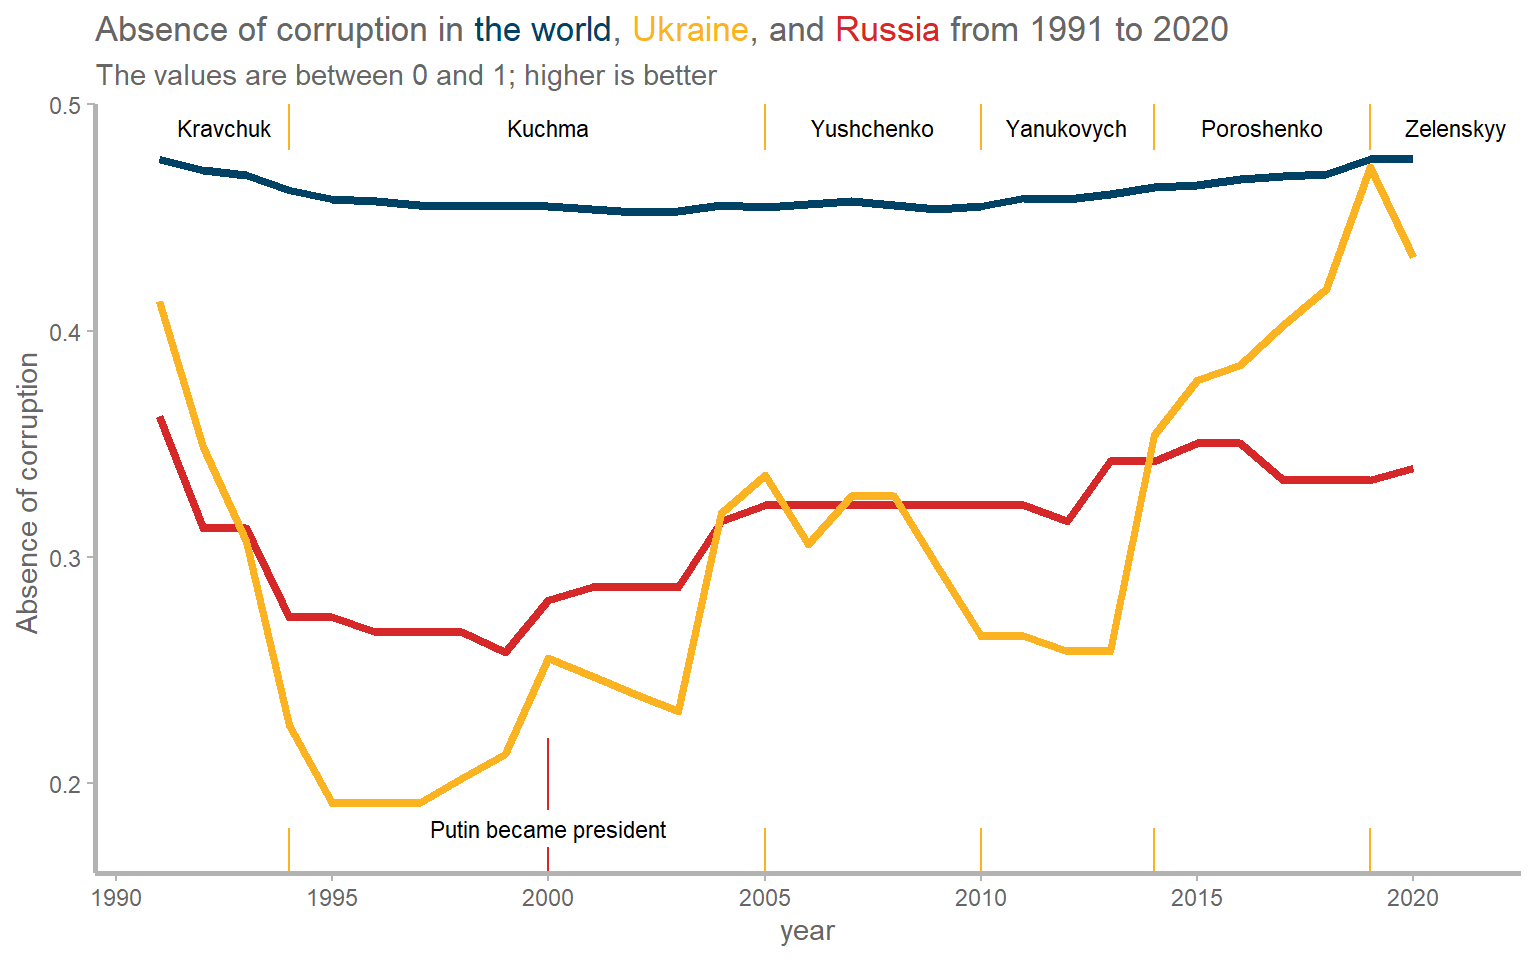

With every new president in Ukraine, we can detect a different trend in
the state of absence of corruption. Russia after Putin improved slowly
but constantly.

### <span class="header-section-number">4.4.2</span> Predictable enforcement

The predictable enforcement subattribute denotes the extent to which the
executive and public officials enforce laws in a predictable manner. To
measure predictable enforcement, five expert-coded V-Dem indicators were
included: the executive’s respect for constitutional provisions, the
presence of transparent laws with predictable enforcement,
rule-abidingness in the public sector, meritocratic appointment criteria
in the state administration and armed forces. To these was added an
indicator from the [International Country Risk
Guider](https://www.prsgroup.com/explore-our-products/international-country-risk-guide/)
(ICRG) (also expert-coded) on the strength and expertise of the
bureaucracy. The six indicators were aggregated into the predictable
enforcement subattribute using item response theory.

``` r
graph_index("predictable_enforcement_A4") +
  geom_segment(aes(x = 2014,
                   y =  0.08,
                   xend = 2014,
                   yend =  0.25
                   ),
               color = "#FCB322"
               ) +
  geom_label(aes(x = c(2014, 2017),
                 y = c(0.2, 0.13),
                 label = c("Independence of Crimea,\nDonetsk and Luhansk",
                           "Poroshenko &\nZelenskyy")
                 ),
             label.size = NA,
             label.padding = unit(0, "lines"),
             size = 3
             )
```

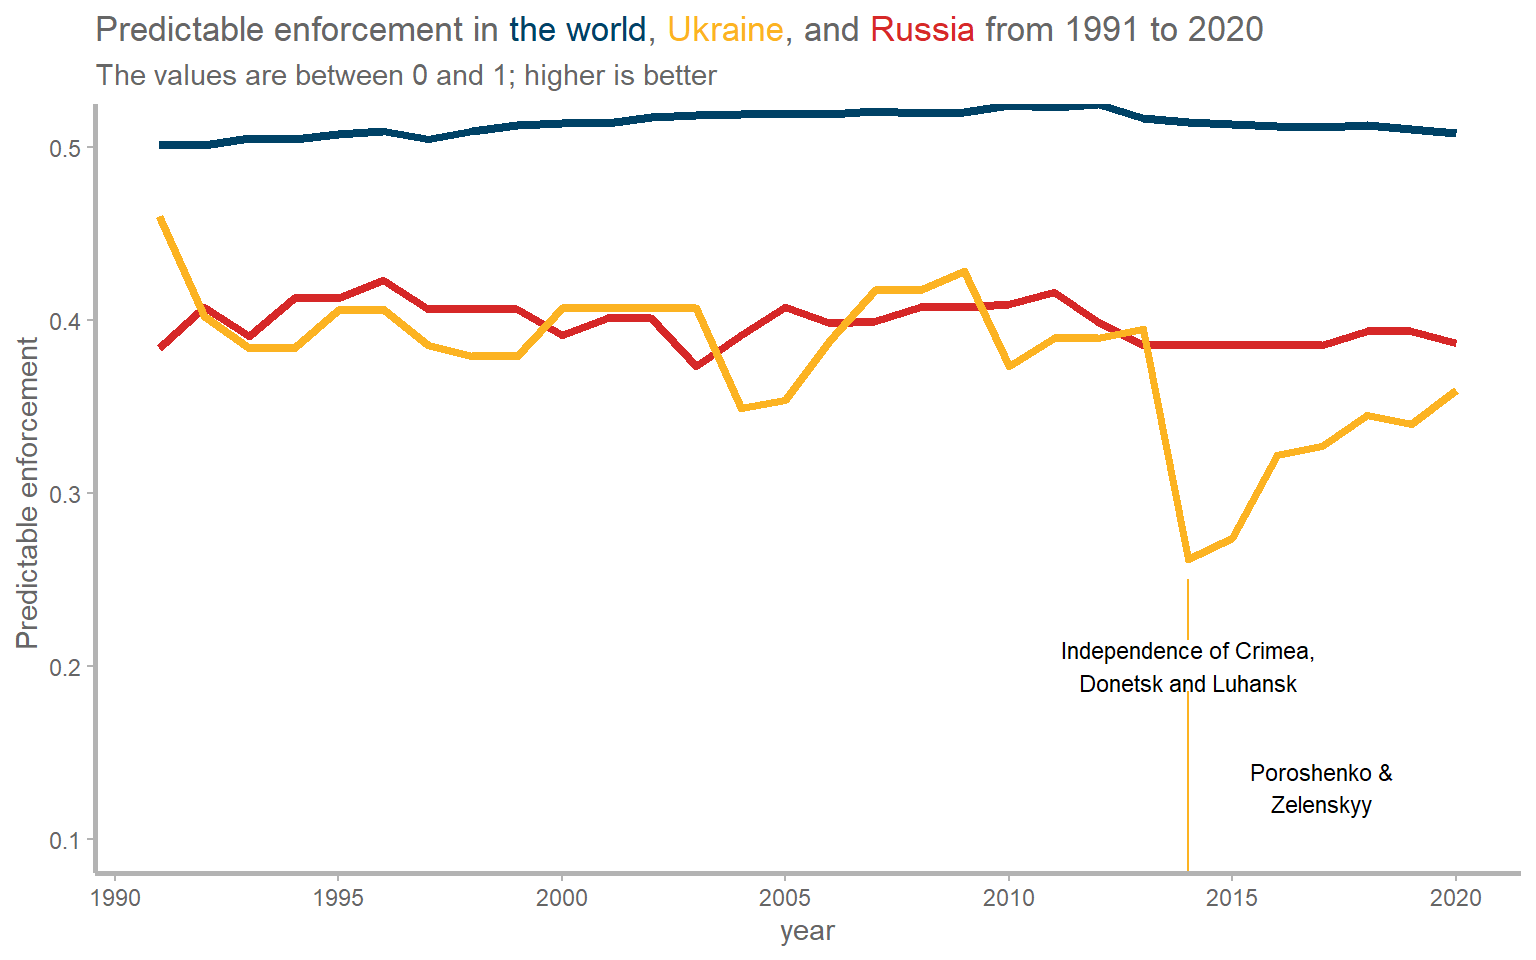

Except for [The Revolution of
Dignity](https://en.wikipedia.org/wiki/Revolution_of_Dignity), which
plummeted Ukraine’s score, both countries fared very similarly. Since
2014 under Poroshenko and Zelenskyy’s administrations, Ukraine has
improved in this subattribute.

## <span class="header-section-number">4.5</span> Paticipatory engagement

Participatory Engagement represents the fifth of the five attributes of
democracy developed by International
[IDEA](https://www.idea.int/gsod/)’s Global State of Democracy Indices.

### <span class="header-section-number">4.5.1</span> Civil society engagement

The measurement of civil society participation relies on six V-Dem
indicators. They result from an expert survey and consider the extent to
which the population is engaged in civil society activities, including
political associations and independent trade unions.

``` r
Ukraine_seg = tibble(x = rep(c(2014, 2015, 2019), 2),
                     y = c(rep(0.64, 3), rep(0.4, 3)),
                     xend = rep(c(2014, 2015, 2019), 2),
                     yend = c(c(0.7, rep(0.67,2)), rep(0.43, 3))
                     )
graph_index("civil_society_participation_A5") +
  geom_segment(data = Ukraine_seg, 
               aes(x = x, y = y, xend = xend, yend = yend),
               color = "#FCB322"
               ) +
  geom_segment(aes(x = 2000, y = 0.4, xend = 2000, yend = 0.44),
               color = "#D62828"
               ) +
  geom_label(aes(x = c(2014, 2017, 2020.5),
                 y = c(0.69, rep(0.65, 2)),
                 label = c("The Revolution of Dignity",
                           "Poroshenko",
                           "Zelenskyy")
                 ),
             label.size = NA,
             label.padding = unit(0, "lines"),
             size = 3
             ) +
  geom_label(aes(x = 2000, y = 0.42,
                 label = "Putin became president"
                 ),
             label.size = NA,
             size = 3
             )
```

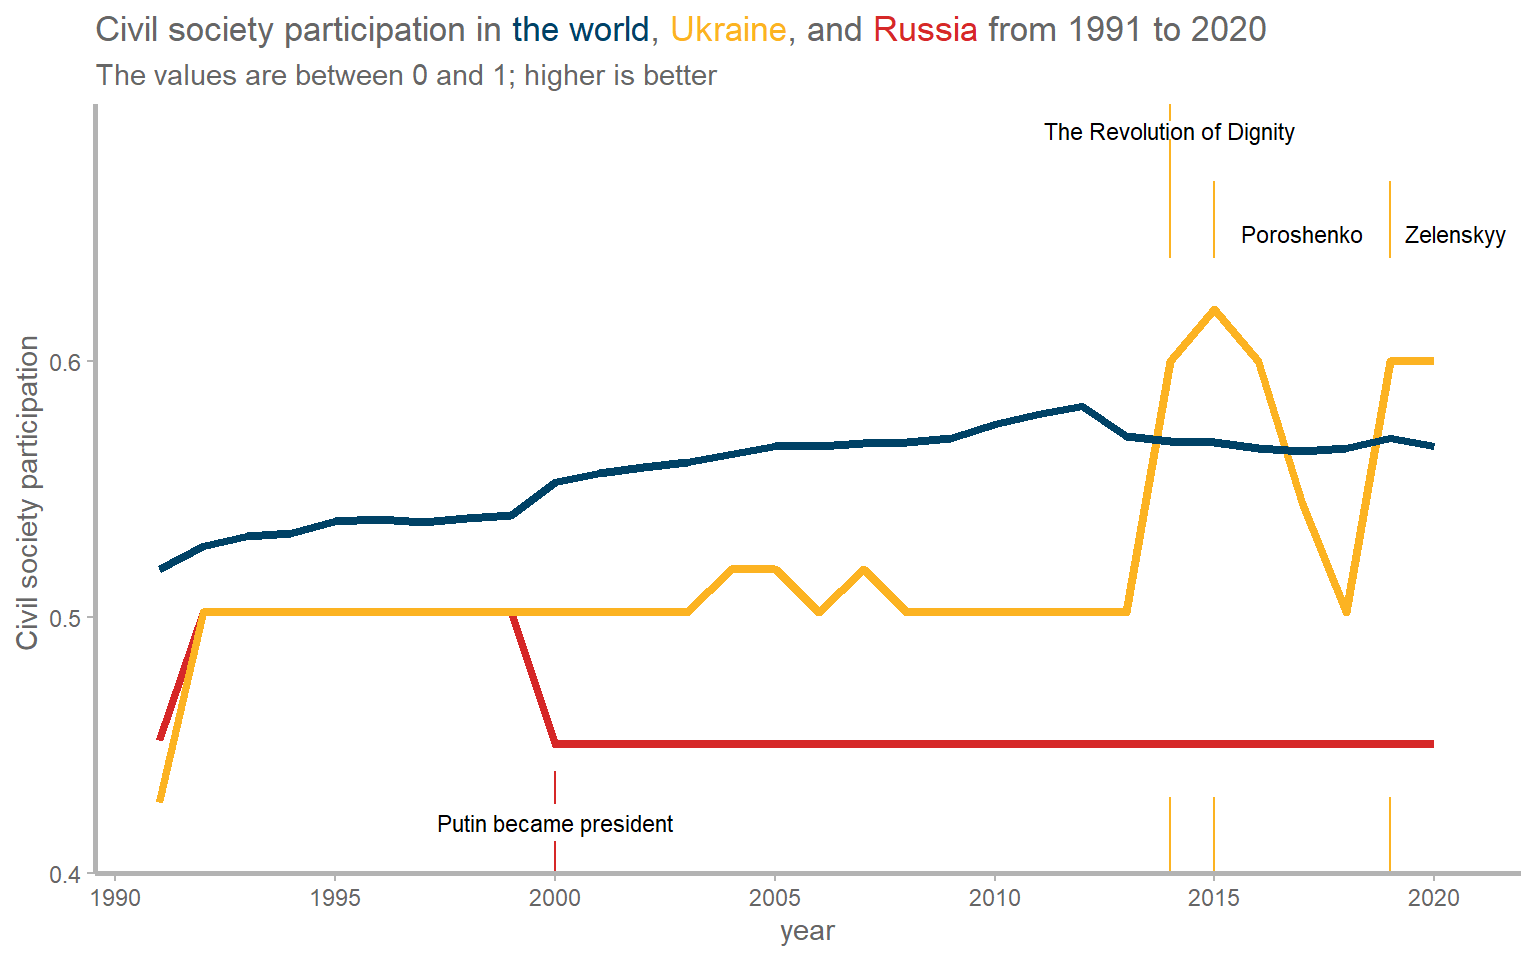

Civil society participation deteriorated in Russia after Putin took the
office but remained constant. Unlike most of the previous subattributes
in Ukraine which worsened as a result of The Revolution of Dignity, this
subattribute improved after the revolution. During Poroshenko’s term,
civil society improved then worsened due to his controversial decisions.
After Zelenskyy the situation improved again.

### <span class="header-section-number">4.5.2</span> Electoral participation

The level of electoral participation for the adult voting age population
(VAP) in the last national election.

``` r
graph_index("electoral_participation_A5") +
  expand_limits(y = c(0.4, 0.85))
```

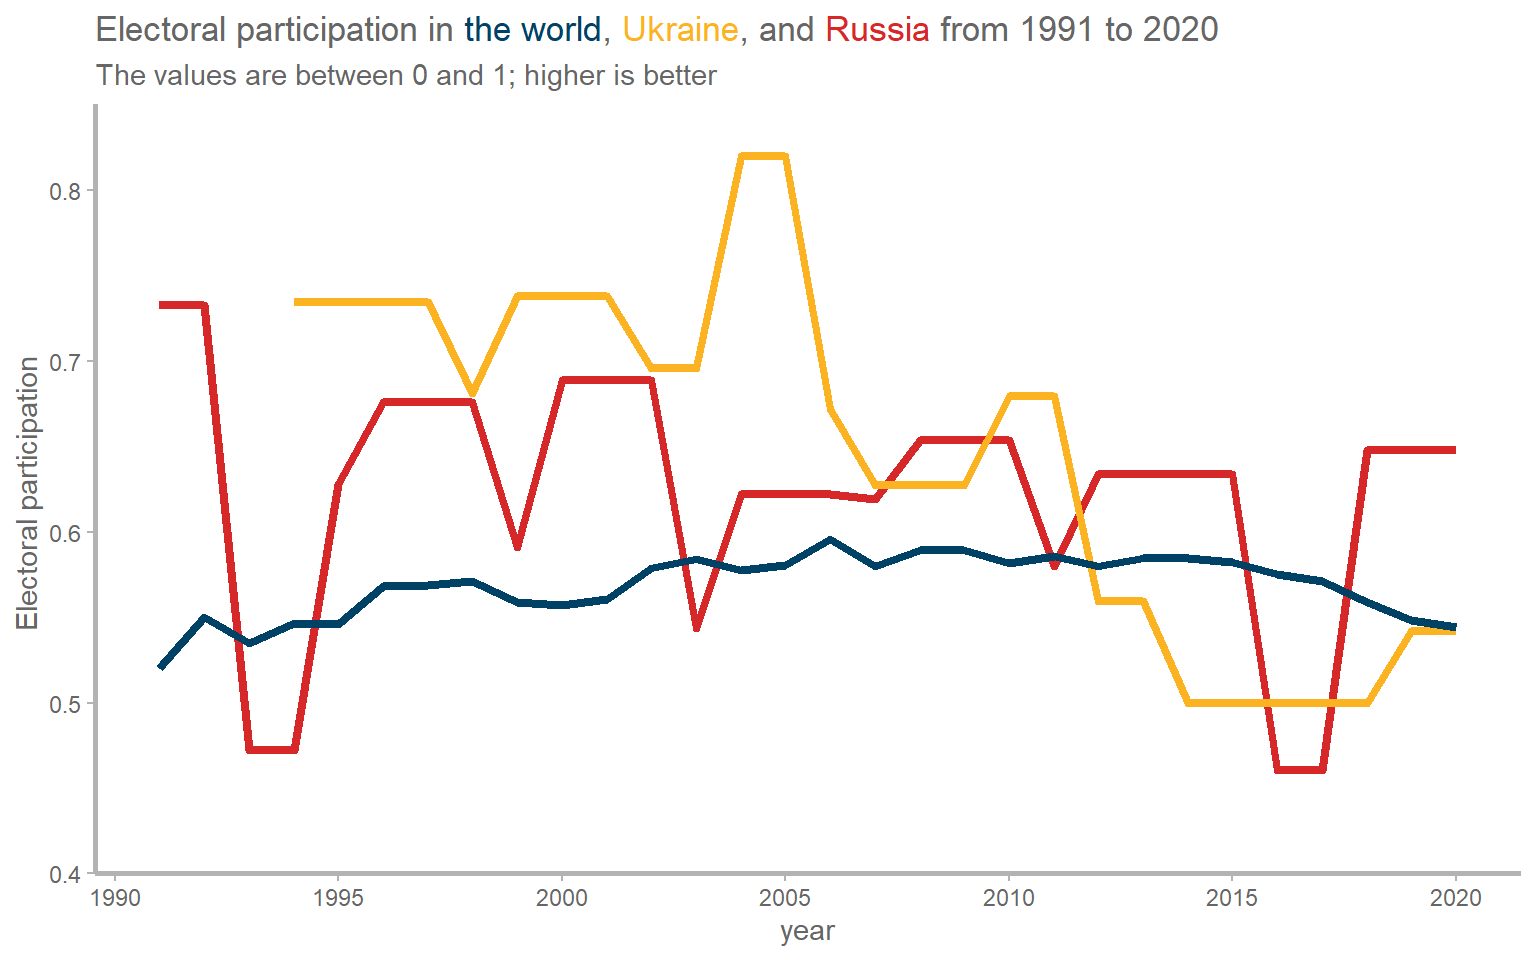

Ukraine’s electoral participation declined during the past three
decades. Russia had a somehow mixed result with many ups and downs.

### <span class="header-section-number">4.5.3</span> Direct democracy

V-Dem offers the only comprehensive data set in the form of the direct
democracy index developed by David Altman (2016). It is based on
observable variables on the formal opportunities for and actual use of
different instruments of direct democracy at the national level.
However, it seems pertinent to take into account whether mechanisms of
direct democracy are available and used in a context where elections are
generally respected as the main source of political power. To do so, the
electoral indicator from [Regime Types and Regime Changes: A New
Dataset](http://www.christianbjoernskov.com/bjoernskovrodedata/)(BRRD)
is also used here. The measure of direct democracy and the electoral
index are multiplied to estimate the subattribute score.

``` r
graph_index("direct_democracy_A5") +
  expand_limits(y = c(-0.08, 0.48))
```

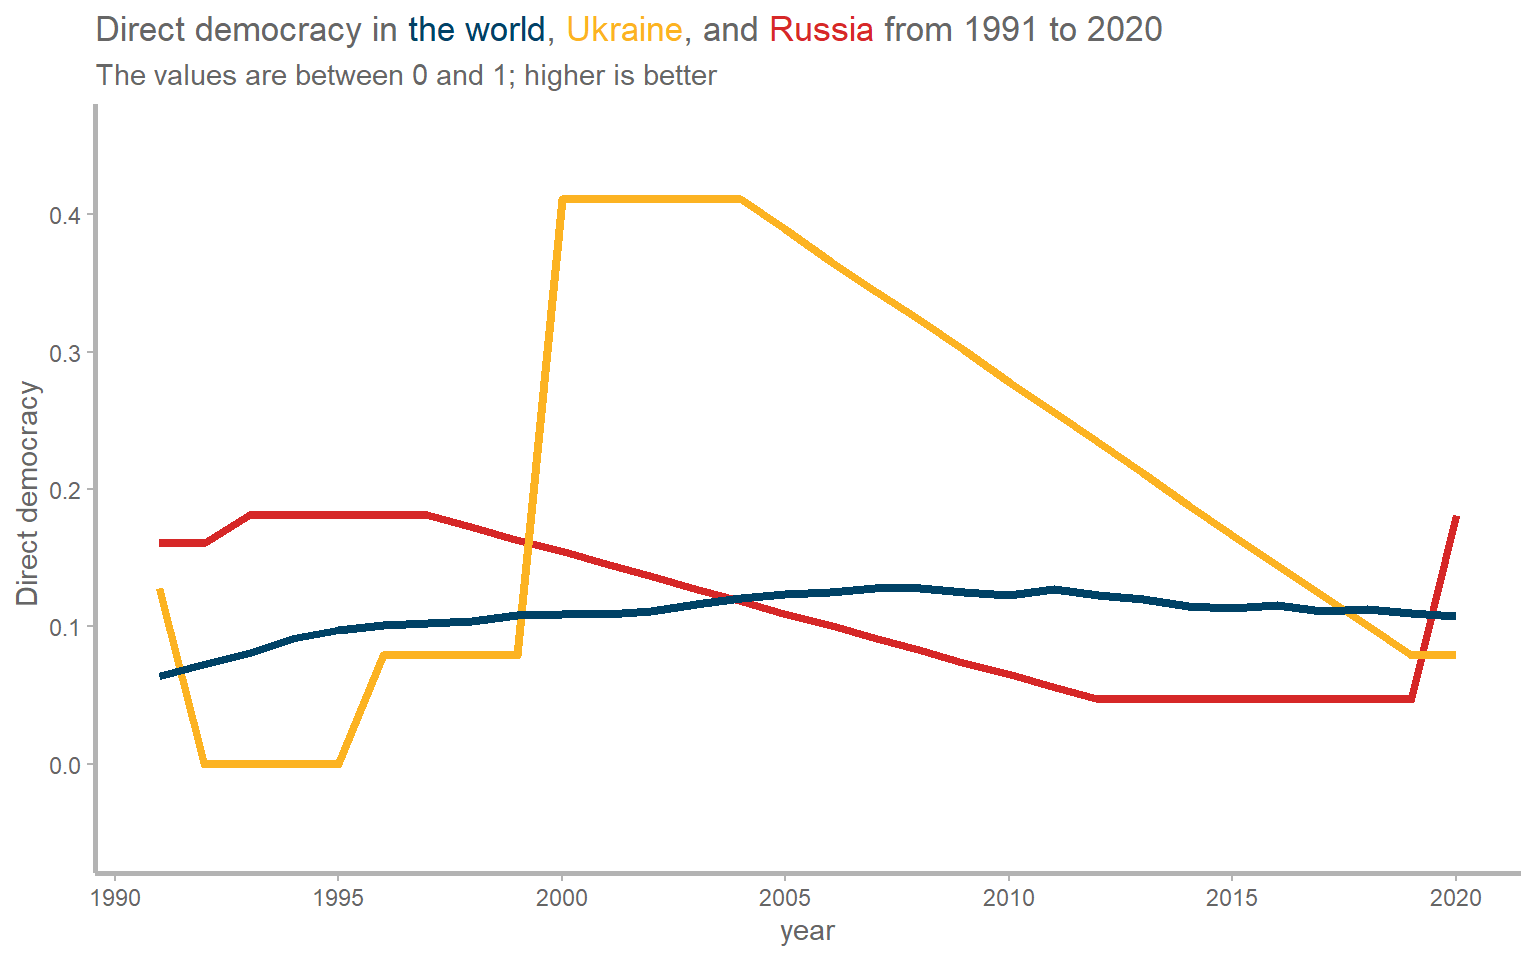

[This
article](https://www.jstor.org/stable/j.ctvddzwx6.24?seq=11#metadata_info_tab_contents)
explains The problem of a declining state of direct democracy in
Ukraine: “It should be said that the institutions of direct democracy,
enveloped in populist slogans of Ukrainian politicians are a rather
abstract form of expressing the will of the nation. There is also a
psychological barrier and the lack of confidence in the authorities of
public administration. Moreover, strikes and demonstrations after the
social events of 2004 and 2014 became a more effective form of influence
on political decisions than going to the polls.” On the other hand, a
massive [constitutional
referendum](https://en.wikipedia.org/wiki/2020_Russian_constitutional_referendum#Opinion_polls)
was held in Russia in 2020 which improved the state of direct democracy
in Russia after many years of stagnation.

### <span class="header-section-number">4.5.4</span> Sub-national elections

V-Dem is also the only provider of a comprehensive, cross-national
dataset on subnational elections. The local government index indicates
whether the local government is elected and whether it is empowered in
relation to the central government, while another indicator assesses the
freedom and fairness of subnational elections.

``` r
graph_index("local_democracy_A5") +
  geom_segment(aes(x = 2000, y = 0.25, xend = 2000, yend = 0.35),
               color = "#D62828"
               ) +
  geom_label(aes(x = 2000, y = 0.3,
                 label = "Putin became president"
                 ),
             label.size = NA,
             size = 3
             )
```

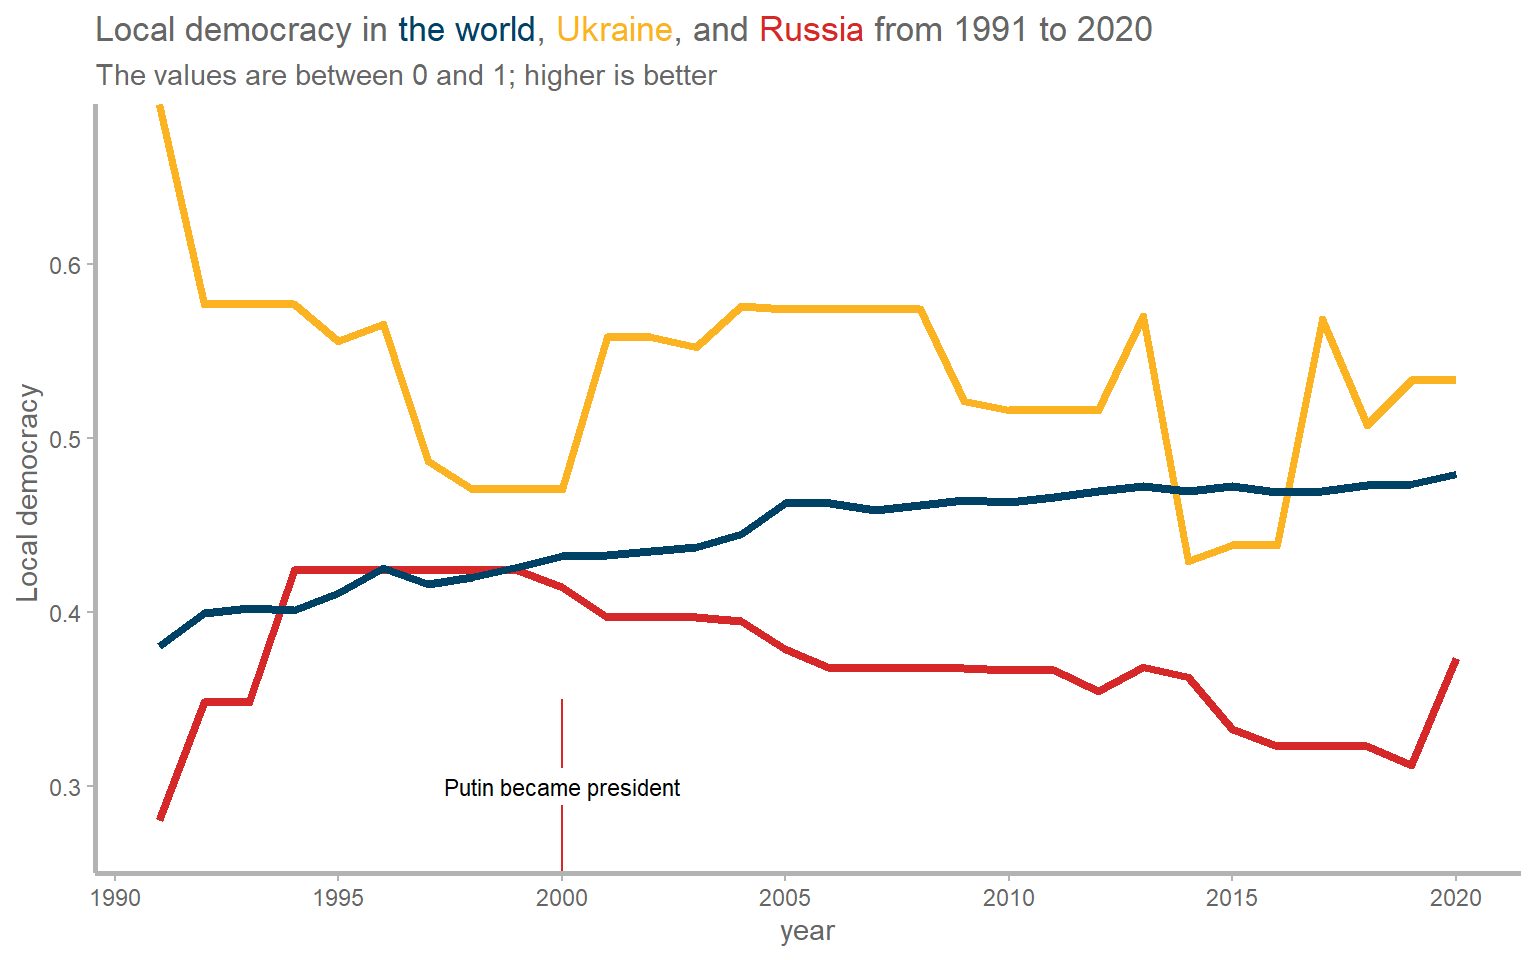

Regarding local democracy, Russia moved downward after Putin’s
inauguration in 2000 but finally improved in 2020. Ukraine’s situation
was more constant during the same period with occasional ups and downs.

# <span class="header-section-number">5</span> Conclusion

We saw throughout this notebook that after Putin took the helm in 2000,
in comparison to the world and Ukraine, Russia’s state of democracy
declined in most of the attributes and subattributes. On the other hand,
Zelenskyy’s Ukraine improved significantly towards a full-fledged
democracy. And guess what is the worst nightmare for a dictator? **A
mature, strong, and thriving democracy in the neighborhood**. As a final
word, Oksana Markarova, The Ukrainian ambassador to the US, made Putin’s
motivation in invading Ukraine clear:

> We’re not a threat to Russia unless being a democracy and living
> peacefully in your own country is a threat.

# <span class="header-section-number">6</span> Acknowledgment

This notebook is highly inspired by [R for political
science](https://rforpoliticalscience.com/) website. It is a collection
of beautiful visualizations of political data using R. Many thanks to
the [International Institute for Democracy and Electoral
Assistance](https://www.idea.int/) (International IDEA) who gathered and
freely shared the comprehensive dataset of the Global State of Democracy
(GSod).